# Workbook for hotel reviews sentiment analysis study for masters dissertation 2023

In [ ]:
## Firstly, import neccesary libraries

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from scipy.stats import chi2
from scipy.stats import chi2_contingency


# The first section covers removing potential fake reviews before any analysis

In [ ]:
# Path to the Excel file
excel_file_path = 'Hotel_Reviews.xlsm'

# Read the Excel file into a dataframe
df = pd.read_excel(excel_file_path)


In [ ]:
# create new column ID and give each entry a unique ID
df['ID'] = range(len(df))

# check the first 5

df.head()

In [ ]:
# Calculate the average number of characters in 'Positive_Review' column
# Convert 'Positive_Review' and 'Negative_Review' columns to strings

df['Positive_Review'] = df['Positive_Review'].astype(str)
df['Negative_Review'] = df['Negative_Review'].astype(str)
average_chars_positive_review = df['Positive_Review'].apply(len).mean()

# Calculate the average number of characters in 'Negative_Review' column
average_chars_negative_review = df['Negative_Review'].apply(len).mean()

print("Average characters in Positive_Review:", average_chars_positive_review)
print("Average characters in Negative_Review:", average_chars_negative_review)


Average characters in Positive_Review: 94.62106922507165
Average characters in Negative_Review: 93.79816689869662


In [ ]:
# Convert 'Positive_Review' and 'Negative_Review' columns to strings
df['Positive_Review'] = df['Positive_Review'].astype(str)
df['Negative_Review'] = df['Negative_Review'].astype(str)

# Filter out rows with positive reviews having more than 50 characters
filtered_positive_reviews = df[df['Positive_Review'].str.len() > 50]

# Find the top 25 duplicated positive reviews and their counts
top_positive_reviews = filtered_positive_reviews['Positive_Review'].value_counts().head(25)
positive_review_counts = top_positive_reviews.values
positive_reviews_texts = top_positive_reviews.index

print("Top 25 duplicated positive reviews (with more than 50 characters) and their counts:")
for review, count in zip(positive_reviews_texts, positive_review_counts):
    print(f"Review: {review}\nCount: {count}\n")

# Filter out rows with negative reviews having more than 50 characters
filtered_negative_reviews = df[df['Negative_Review'].str.len() > 50]

# Find the top 25 duplicated negative reviews and their counts
top_negative_reviews = filtered_negative_reviews['Negative_Review'].value_counts().head(25)
negative_review_counts = top_negative_reviews.values
negative_reviews_texts = top_negative_reviews.index

print("Top 25 duplicated negative reviews (with more than 50 characters) and their counts:")
for review, count in zip(negative_reviews_texts, negative_review_counts):
    print(f"Review: {review}\nCount: {count}\n")


Top 25 duplicated positive reviews (with more than 50 characters) and their counts:
Review:  The room was very spacious and nicely arranged to separate business and leisure Friendly personnel extra nice The whole service The personnel was perfect and the room very comfortable 
Count: 8

Review:  The hotel the staff and location are fantastic Quiet gracious room I felt very safe at this hotel I am glad that I spent my holiday here 
Count: 6

Review:  Excellent location staff very friendly and helpful 
Count: 4

Review:  Great location Friendly staff Good value for money 
Count: 4

Review:  The only good thing about this hotel is the location 
Count: 3

Review:  The location was excellent and the staff were very friendly and helpful 
Count: 3

Review:  The location is great and the staff are very helpful 
Count: 3

Review:  The staff were friendly and the breakfast was good 
Count: 3

Review:  The reception staff were very friendly and helpful 
Count: 3

Review:  The bed was very comfort

In [ ]:
# Convert 'Positive_Review' and 'Negative_Review' columns to strings
df['Positive_Review'] = df['Positive_Review'].astype(str)
df['Negative_Review'] = df['Negative_Review'].astype(str)

# Filter out rows with positive reviews having more than 50 characters
filtered_positive_reviews = df[df['Positive_Review'].str.len() > 50]

# Find the duplicated positive reviews occurring more than 5 times
duplicated_positive_reviews = filtered_positive_reviews[filtered_positive_reviews.duplicated('Positive_Review', keep=False)]

# Get the specific negative review
specific_negative_review = "Would have liked tea coffee making facilities in the room"
duplicated_negative_reviews = df[df['Negative_Review'] == specific_negative_review]

# Concatenate both positive and specific negative reviews into one dataframe
duplicated_reviews = pd.concat([duplicated_positive_reviews, duplicated_negative_reviews])

# Reset the index of the duplicated_reviews dataframe
duplicated_reviews.reset_index(drop=True, inplace=True)


In [ ]:
# Create 'high_volume_reviews' containing entries with 'Total_Number_of_Reviews_Reviewer_Has_Given' higher than 100
high_volume_reviews = df[df['Total_Number_of_Reviews_Reviewer_Has_Given'] > 100]

In [ ]:
# Replace missing values (NaN) with empty strings in the 'Positive_Review' column
df['Positive_Review'] = df['Positive_Review'].fillna('')
# Convert 'Positive_Review' column to strings
df['Positive_Review'] = df['Positive_Review'].astype(str)

# Filter positive reviews with more than 100 characters
df_350_pos = df[df['Positive_Review'].apply(lambda x: len(x) > 350)]


# Create a TF-IDF vectorizer to convert text into numerical vectors
tfidf_vectorizer = TfidfVectorizer()

# Compute the TF-IDF matrix for the processed positive reviews
tfidf_matrix = tfidf_vectorizer.fit_transform(df_350_pos['Positive_Review'])

# Compute the cosine similarity matrix for positive reviews
cosine_sim_positive_reviews = cosine_similarity(tfidf_matrix)

# Find review pairs with cosine similarity greater than 0.9 (90% similarity)
similar_reviews = []
for i in range(len(cosine_sim_positive_reviews)):
    for j in range(i + 1, len(cosine_sim_positive_reviews)):
        if cosine_sim_positive_reviews[i, j] > 0.9:
            similar_reviews.append((i, j))

# Display the pairs of positive reviews with over 90% similarity (index of the reviews in the dataframe)
print("Pairs of positive reviews with over 90% similarity:")
for pair in similar_reviews:
    print(f"Review {pair[0]} and Review {pair[1]}")

# Create a new DataFrame containing similar reviews
similar_reviews_df_pos = df_350_pos.iloc[similar_reviews]

Pairs of positive reviews with over 90% similarity:
Review 1516 and Review 1517
Review 2147 and Review 2148
Review 2241 and Review 8096
Review 5519 and Review 5527
Review 5520 and Review 5528
Review 5521 and Review 5529
Review 5522 and Review 5530
Review 5523 and Review 5531
Review 5524 and Review 5532
Review 5525 and Review 5533
Review 5526 and Review 5534
Review 6610 and Review 6612
Review 7408 and Review 7415
Review 7409 and Review 7416
Review 7410 and Review 7417
Review 7411 and Review 7418
Review 7412 and Review 7419
Review 7413 and Review 7420
Review 7414 and Review 7421
Review 8546 and Review 8550
Review 8671 and Review 8674
Review 9959 and Review 9960
Review 11903 and Review 11904
Review 13086 and Review 13087
Review 14851 and Review 14852
Review 16594 and Review 16595


In [ ]:

# Replace missing values (NaN) with empty strings in the 'Positive_Review' column
df['Negative_Review'] = df['Negative_Review'].fillna('')

# Convert 'Positive_Review' column to strings
df['Negative_Review'] = df['Negative_Review'].astype(str)

# Filter positive reviews with more than 200 characters
df_350_neg = df[df['Negative_Review'].apply(lambda x: len(x) > 350)]

# Create a TF-IDF vectorizer to convert text into numerical vectors
tfidf_vectorizer = TfidfVectorizer()

# Compute the TF-IDF matrix for the processed positive reviews
tfidf_matrix = tfidf_vectorizer.fit_transform(df_350_neg['Negative_Review'])

# Compute the cosine similarity matrix for positive reviews
cosine_sim_negative_reviews = cosine_similarity(tfidf_matrix)

# Find review pairs with cosine similarity greater than 0.9 (90% similarity)
similar_reviews = []
for i in range(len(cosine_sim_positive_reviews)):
    for j in range(i + 1, len(cosine_sim_positive_reviews)):
        if cosine_sim_positive_reviews[i, j] > 0.9:
            similar_reviews.append(i)
            similar_reviews.append(j)

# Remove duplicates and keep only unique indices
similar_reviews = list(set(similar_reviews))

# Create a new DataFrame containing similar reviews
similar_reviews_df_neg = df_350_neg.iloc[similar_reviews]


In [ ]:
# Concatenate the DataFrames vertically
fake_reviews = pd.concat([duplicated_reviews, high_volume_reviews, similar_reviews_df_pos, similar_reviews_df_neg], ignore_index=True)

In [ ]:
# Display the merged DataFrame
fake_reviews

Hotel_Address  \
0      s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1     1 8 Russell Square Camden London WC1B 5BE Unit...   
2     1 8 Russell Square Camden London WC1B 5BE Unit...   
3     1 Aldwych Westminster Borough London WC2B 4BZ ...   
4     1 Inverness Terrace Westminster Borough London...   
...                                                 ...   
1505  Wibautstraat 129 Oost 1091 GL Amsterdam Nether...   
1506  Portland Place Westminster Borough London W1B ...   
1507  Portland Place Westminster Borough London W1B ...   
1508  Portland Place Westminster Borough London W1B ...   
1509  Wibautstraat 129 Oost 1091 GL Amsterdam Nether...   

      Additional_Number_of_Scoring          Review_Date  Average_Score  \
0                              194  2017-04-05 00:00:00            7.7   
1                              724            9/29/2015            8.0   
2                              724            5/26/2016            8.0   
3                               60  2017-08-01 00:00:00            9.2   
4                             1274            8/20/2015            7.7   
...                            ...                  ...            ...   
1505                           975            7/22/2016            8.7   
1506                           375  2017-11-07 00:00:00            9.3   
1507                           375  2017-11-07 00:00:00            9.3   
1508                           375  2017-11-07 00:00:00            9.3   
1509                           975            7/22/2016            8.7   

                            Hotel_Name Reviewer_Nationality  \
0                          Hotel Arena              Canada    
1                 The Principal London           Australia    
2                 The Principal London              Norway    
3                          One Aldwych              Kuwait    
4        Grand Royale London Hyde Park             Ireland    
...                                ...                  ...   
1505  The Student Hotel Amsterdam City      United Kingdom    
1506                The Langham London             Germany    
1507                The Langham London             Germany    
1508                The Langham London             Germany    
1509  The Student Hotel Amsterdam City      United Kingdom    

                                        Negative_Review  \
0      The hotel was under renovation while we there...   
1      The hot water was only warm in the shower bat...   
2                                           No Negative   
3                                           No Negative   
4      The room was tiny and breakfast should really...   
...                                                 ...   
1505   There are still renovating the cheery sounds ...   
1506   After 3 days stay I booked again for 4 days B...   
1507   After 3 days stay I booked again for 4 days B...   
1508   After 3 days stay I booked again for 4 days B...   
1509   There are still renovating the cheery sounds ...   

      Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                    18                     1403   
1                                    22                     3150   
2                                     0                     3150   
3                                     0                      259   
4                                    14                     6539   
...                                 ...                      ...   
1505                                186                     7656   
1506                                112                     1276   
1507                                 93                     1276   
1508                                 93                     1276   
1509                                158                     7656   

                                        Positive_Review  \
0      The bed was very comfortable and the room was...   
1      The room was beautiful and the bed w

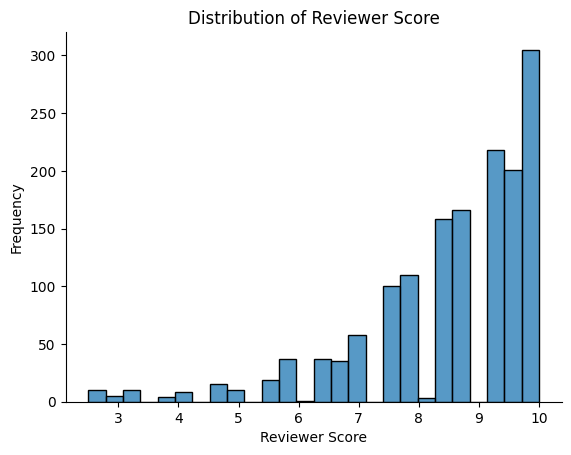

In [ ]:
# Create a histogram to visualize the distribution of 'Reviewer_score'
ax = sns.histplot(data=merged_df, x='Reviewer_Score', kde=False)
plt.title('Distribution of Reviewer Score')
plt.xlabel('Reviewer Score')
plt.ylabel('Frequency')

# Remove the top and right spines
sns.despine(top=True, right=True)

plt.show()


In [ ]:
# Create the 'sentiment' column based on conditions
fake_reviews['sentiment'] = fake_reviews['Reviewer_Score'].apply(lambda x: 'Positive' if x >= 7 else 'Negative')

In [ ]:
# Filter out rows with 'Reviewer_Score' between 5 and 6.9 (inclusive)
fake_reviews = fake_reviews[~fake_reviews['Reviewer_Score'].between(5, 6.9)]

In [ ]:
# Get the indices of rows to be removed
indices_to_remove = df[df['ID'].isin(fake_reviews['ID'])].index

# Drop the rows from df
df.drop(indices_to_remove, inplace=True)

In [ ]:
# merge the dataframes
df = pd.concat([df, fake_reviews], ignore_index=True)

In [ ]:
# Step 1: Create a random sample of 1250 entries from 'Fake_reviews'
sample_size = 1250
fake_reviews_sample = fake_reviews.sample(n=sample_size, random_state=42)

# Step 2: Get the indices of the sampled entries from 'Fake_reviews'
fake_reviews_indices = fake_reviews_sample.index.tolist()

# Step 3: Create a random sample of 1250 entries from 'df' without any overlap with 'Fake_reviews'
df_sample = df[~df.index.isin(fake_reviews_indices)].sample(n=sample_size, random_state=42)

In [ ]:
# Create the "Fake" column in fake_reviews_sample with all values set to 'yes'
fake_reviews_sample['Fake'] = 'yes'

# Create the "Fake" column in df_sample with all values set to 'no'
df_sample['Fake'] = 'no'


In [ ]:
# Concatenate both dataframes to create a new dataframe
merged_df = pd.concat([fake_reviews_sample, df_sample], ignore_index=True)

# Optional: If you want to shuffle the rows in the merged dataframe
merged_df = merged_df.sample(frac=1).reset_index(drop=True)


In [ ]:
# merge the positive and negative reviews into one column reviewText
merged_df['reviewText'] = merged_df['Positive_Review'].fillna('') + ' ' + merged_df['Negative_Review'].fillna('')

In [ ]:
# change columns to strings
merged_df['reviewText'] = merged_df['reviewText'].astype(str)
merged_df['Fake'] = merged_df['Fake'].astype(str)

In [ ]:
# Download Java and Spark

!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"

In [ ]:
#start spark session

import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark.conf.set("spark.sql.caseSensitive", True) # Avoid error "Found duplicate column(s) in the data schema"
spark

In [ ]:
# More operations are available from Spark's SQL functions
from pyspark.sql import functions as f

# Use nickname feat for the subpackage
import pyspark.ml.feature as feat

# We need Pipeline to streamline the workflow
from pyspark.ml import Pipeline

# Use logistic regression
from pyspark.ml.classification import LogisticRegression, NaiveBayes, RandomForestClassifier

# Import an evaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Additional functions for tuning parameters
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [ ]:
Sample = spark.createDataFrame(merged_df)

/content/spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/pandas/conversion.py:371: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


In [ ]:
Dataset= spark.createDataFrame(df)

In [ ]:
Sample = (Sample
          #Remove special characters
          .withColumn("reviewText", f.regexp_replace(f.col("reviewText"), "[^a-zA-Z']", " "))
          #Remove leading and trailing whitespaces
          .withColumn("reviewText", f.trim(f.col("reviewText")))
)

In [ ]:
# Make a split

(training, test) = Sample.randomSplit([0.8, 0.2],seed = 9165)

LOGISTIC REGRESION WITH TF IDF

In [ ]:
# Logistic regression with TF-IDF

# Build up the pipeline/workflow for Logistic Regression

# Split the tweets into words
splitter = feat.RegexTokenizer(
    inputCol='reviewText'
    , outputCol='text_split'
    , pattern='\s+'
)

# Remove stop words
sw_remover = feat.StopWordsRemover(
    inputCol=splitter.getOutputCol()
    , outputCol='text_noSW'
)

# Count word frequency
count_vec = feat.CountVectorizer(
    inputCol=sw_remover.getOutputCol()
    , outputCol='vector'
)

# Calculate IDF
idf_cal = feat.IDF(
    inputCol=count_vec.getOutputCol()
    , outputCol='features'
    , minDocFreq=5
)

# Prepare the target variable
label_string = feat.StringIndexer(
    inputCol = "Fake"
    , outputCol = "label"
)

# Logistic Regression model
lr = LogisticRegression(
    maxIter=100
)


# Finally set up the pipline
sentiment_pipeline_idf_lr = Pipeline(
    stages=[
            splitter
            , sw_remover
            , count_vec
            , idf_cal
            , label_string
            , lr
            ]
)

In [ ]:
# Set up the parameters to tune
parGrid = ParamGridBuilder() \
          .addGrid(count_vec.vocabSize, [500, 2000, 4000]) \
          .addGrid(lr.regParam, [0.1,2.5, 5]) \
          .build()

# Set up the cross validation
crossVal = CrossValidator(estimator=sentiment_pipeline_idf_lr,
                          estimatorParamMaps=parGrid,
                          evaluator=MulticlassClassificationEvaluator(metricName="accuracy"),
                          numFolds=10,
                          seed=9165)

In [ ]:
# Fit the process to the training data set

cvModel = crossVal.fit(training)

In [ ]:
# Summarise nicely the results of different parameter combinations

for i in range(len(cvModel.avgMetrics)):
  myParam = parGrid[i]
  myModel = "Model parameters: "
  for key, value in myParam.items():
    myModel += (key.name + '=' + str(value) + ' ')
  print(myModel+"has average accuracy: "+str(cvModel.avgMetrics[i]))

Model parameters: vocabSize=500 regParam=0.1 has average accuracy: 0.6541684039164177
Model parameters: vocabSize=500 regParam=2.5 has average accuracy: 0.6364303925904596
Model parameters: vocabSize=500 regParam=5.0 has average accuracy: 0.6167123763679565
Model parameters: vocabSize=2000 regParam=0.1 has average accuracy: 0.6689408270749003
Model parameters: vocabSize=2000 regParam=2.5 has average accuracy: 0.6561724834465532
Model parameters: vocabSize=2000 regParam=5.0 has average accuracy: 0.641702736842139
Model parameters: vocabSize=4000 regParam=0.1 has average accuracy: 0.6689408270749003
Model parameters: vocabSize=4000 regParam=2.5 has average accuracy: 0.6561724834465532
Model parameters: vocabSize=4000 regParam=5.0 has average accuracy: 0.641702736842139


In [ ]:
# Apply the best model to the test data set

cv_prediction = cvModel.transform(test)
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")


evaluator_f1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
f1 = evaluator_f1.evaluate(cv_prediction)

cv_accuracy = evaluator.evaluate(cv_prediction)
print("Accuracy of the best Logistic Regression model with the test data is %g"% (cv_accuracy))

print("F1 score of the best Logistic Regression model with the test data is %g" % f1)

Accuracy of the best Logistic Regression model with the test data is 0.702128
F1 score of the best Logistic Regression model with the test data is 0.702034


NAIVE BAYES WITH TF IDF

In [ ]:
# naive bayes with TF-IDF
# Build up the pipeline/workflow for Naive Bayes

# Split the tweets into words
splitter = feat.RegexTokenizer(
    inputCol='reviewText'
    , outputCol='text_split'
    , pattern='\s+'
)

# Remove stop words
sw_remover = feat.StopWordsRemover(
    inputCol=splitter.getOutputCol()
    , outputCol='text_noSW'
)

# Count word frequency
count_vec = feat.CountVectorizer(
    inputCol=sw_remover.getOutputCol()
    , outputCol='vector'
)

# Calculate IDF
idf_cal = feat.IDF(
    inputCol=count_vec.getOutputCol()
    , outputCol='features'
    , minDocFreq=5
)

# Prepare the target variable
label_string = feat.StringIndexer(
    inputCol = "Fake"
    , outputCol = "label"
)

# Naive Bayes model
nb = NaiveBayes(
)


# Finally set up the pipline
sentiment_pipeline_idf_nb = Pipeline(
    stages=[
            splitter
            , sw_remover
            , count_vec
            , idf_cal
            , label_string
            , nb
            ]
)

In [ ]:
# Set up the parameters to tune
parGrid = ParamGridBuilder() \
          .addGrid(count_vec.vocabSize, [500, 1000, 1500, 2000]) \
          .addGrid(nb.smoothing, [1, 0]) \
          .build()

# Set up the cross validation
crossVal = CrossValidator(estimator=sentiment_pipeline_idf_nb,
                          estimatorParamMaps=parGrid,
                          evaluator=MulticlassClassificationEvaluator(metricName="accuracy"),
                          numFolds=10,
                          seed=9165)

In [ ]:
# Fit the process to the training data set

cvModel = crossVal.fit(training)

In [ ]:
# Summarise nicely the results of different parameter combinations

for i in range(len(cvModel.avgMetrics)):
  myParam = parGrid[i]
  myModel = "Model parameters: "
  for key, value in myParam.items():
    myModel += (key.name + '=' + str(value) + ' ')
  print(myModel+"has average accuracy: "+str(cvModel.avgMetrics[i]))

Model parameters: vocabSize=500 smoothing=1.0 has average accuracy: 0.610074004604162
Model parameters: vocabSize=500 smoothing=0.0 has average accuracy: 0.6091879882496973
Model parameters: vocabSize=1000 smoothing=1.0 has average accuracy: 0.628422422644327
Model parameters: vocabSize=1000 smoothing=0.0 has average accuracy: 0.6245236898265959
Model parameters: vocabSize=1500 smoothing=1.0 has average accuracy: 0.6303990603086429
Model parameters: vocabSize=1500 smoothing=0.0 has average accuracy: 0.5601769477498284
Model parameters: vocabSize=2000 smoothing=1.0 has average accuracy: 0.630710963197257
Model parameters: vocabSize=2000 smoothing=0.0 has average accuracy: 0.5309492424154656


In [ ]:
# Apply the best model to the test data set

cv_prediction = cvModel.transform(test)
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
cv_accuracy = evaluator.evaluate(cv_prediction)
print("Accuracy of the best Naive Bayes model with the test data is %g"% (cv_accuracy))

Accuracy of the best Naive Bayes model with the test data is 0.651838


RANDOM FOREST WITH TF-IDF

In [ ]:
# random forest with TF-IDF
# Build another pipeline for Random Forest

# Split the tweets into words
splitter = feat.RegexTokenizer(
    inputCol='reviewText'
    , outputCol='text_split'
    , pattern='\s+'
)

# Remove stop words
sw_remover = feat.StopWordsRemover(
    inputCol=splitter.getOutputCol()
    , outputCol='text_noSW'
)

# Count word frequency
count_vec = feat.CountVectorizer(
    inputCol=sw_remover.getOutputCol()
    , outputCol='vector'
)

# Calculate IDF
idf_cal = feat.IDF(
    inputCol=count_vec.getOutputCol()
    , outputCol='features'
)

# Prepare the target variable
label_string = feat.StringIndexer(
    inputCol = "Fake"
    , outputCol = "label"
)

# Random forest model
rf = RandomForestClassifier(
)


# Finally set up the pipline
sentiment_pipeline_idf_rf = Pipeline(
    stages=[
            splitter
            , sw_remover
            , count_vec
            , idf_cal
            , label_string
            , rf
            ]
)

In [ ]:
# Set up the parameters to tune
parGrid = ParamGridBuilder() \
          .addGrid(idf_cal.minDocFreq, [5, 10, 15]) \
          .addGrid(rf.numTrees, [20, 15, 10]) \
         .addGrid(rf.maxDepth, [ 4,3, 2]) \
          .addGrid(count_vec.vocabSize, [500, 1000, 1500, 2000]) \
          .build()

# Set up the cross validation
crossVal = CrossValidator(estimator=sentiment_pipeline_idf_rf,
                          estimatorParamMaps=parGrid,
                          evaluator=MulticlassClassificationEvaluator(metricName="accuracy"),
                          numFolds=10,
                          seed=9165)

In [ ]:
# Fit the process to the training data set

cvModel = crossVal.fit(training)

In [ ]:
# Summarise nicely the results of different parameter combinations

for i in range(len(cvModel.avgMetrics)):
  myParam = parGrid[i]
  myModel = "Model parameters: "
  for key, value in myParam.items():
    myModel += (key.name + '=' + str(value) + ' ')
  print(myModel+"has average accuracy: "+str(cvModel.avgMetrics[i]))

Model parameters: minDocFreq=5 numTrees=20 maxDepth=4 vocabSize=500 has average accuracy: 0.6256310682502593
Model parameters: minDocFreq=5 numTrees=20 maxDepth=4 vocabSize=1000 has average accuracy: 0.6103713855087727
Model parameters: minDocFreq=5 numTrees=20 maxDepth=4 vocabSize=1500 has average accuracy: 0.6155967048803378
Model parameters: minDocFreq=5 numTrees=20 maxDepth=4 vocabSize=2000 has average accuracy: 0.6228269184513353
Model parameters: minDocFreq=5 numTrees=20 maxDepth=3 vocabSize=500 has average accuracy: 0.6092407810762065
Model parameters: minDocFreq=5 numTrees=20 maxDepth=3 vocabSize=1000 has average accuracy: 0.5964945673064515
Model parameters: minDocFreq=5 numTrees=20 maxDepth=3 vocabSize=1500 has average accuracy: 0.6046989861881303
Model parameters: minDocFreq=5 numTrees=20 maxDepth=3 vocabSize=2000 has average accuracy: 0.6113526516415916
Model parameters: minDocFreq=5 numTrees=20 maxDepth=2 vocabSize=500 has average accuracy: 0.5972026157512696
Model paramet

In [ ]:
# Apply the best model to the test data set

cv_prediction = cvModel.transform(test)
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")


evaluator_f1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
f1 = evaluator_f1.evaluate(cv_prediction)


cv_accuracy = evaluator.evaluate(cv_prediction)
print("Accuracy of the best Random Forest model with the test data is %g"% (cv_accuracy))
print("F1 score of the best Logistic Regression model with the test data is %g" % f1)

Accuracy of the best Random Forest model with the test data is 0.613153
F1 score of the best Logistic Regression model with the test data is 0.612427


# The next sections covers the main changes made to the dataset before the main analysis

In [ ]:
# Remove brackets and leading/trailing whitespace, then split 'Tags' column
split_tags = df['Tags'].str.strip("'[]' ").str.split(', ', expand=True, n=4)

# Assign split values to new columns
df['Booking_type'] = split_tags[0]
df['Customer_type'] = split_tags[1]
df['Room_type'] = split_tags[2]
df['Duration'] = split_tags[3]

In [ ]:
# Strip single quotes and spaces from 'Booking_type'
df['Duration'] = df['Duration'].str.strip("' ")

In [ ]:
# Identify rows with incorrect Booking_type and shift data one step to the right
mask = ~df['Booking_type'].isin(['Leisure trip', 'Business trip'])
df.loc[mask, 'Booking_type':'Duration'] = df.loc[mask, 'Customer_type':'Duration'].shift(1, axis=1)


In [ ]:
# remove columns that are not needed
columns_to_drop = ['Tags', 'Fake', 'lat', 'lng', 'days_since_review']
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# Map Booking_type values to Booking_type_num
booking_type_map = {'Leisure trip': 0, 'Business trip': 1}
df['Booking_type_num'] = df['Booking_type'].map(booking_type_map)

In [ ]:
# Extract numeric part using regular expression, or set to 2 if not found
def extract_duration(x):
    if isinstance(x, str):
        matches = re.findall(r'\d+', x)
        if matches:
            return int(matches[0])
    return 2

df['Duration'] = df['Duration'].apply(extract_duration)

In [ ]:
# Convert 'Reviewer_Score' column to numeric
df['Reviewer_Score'] = pd.to_numeric(df['Reviewer_Score'], errors='coerce')

# Function to determine sentiment
def get_sentiment(score):
    if score >= 7:
        return 'Positive'
    elif score >= 5:
        return 'Neutral'
    else:
        return 'Negative'

# Add 'Sentiment' column using the custom function
df['Sentiment'] = df['Reviewer_Score'].apply(get_sentiment)





In [ ]:
# Define keywords to identify
keywords = ['Superior', 'Deluxe', 'Luxury', 'Premier']

# Replace keywords in 'Room_type' column with 'Luxury Room'
for keyword in keywords:
    df.loc[df['Room_type'].str.contains(keyword, case=False, na=False), 'Room_type'] = 'Luxury Room'


In [ ]:
keywords = [ '2', '3' , '4' , '5' , '6' , '7']

# Replace keywords in 'Room_type' column with 'Luxury Room'
for keyword in keywords:
    df.loc[df['Duration'].str.contains(keyword, case=False, na=False), 'Duration'] = 'Average stay'


In [ ]:
# List of predefined room types
valid_room_types = ['Double Room', 'Luxury Room', 'Twin Room', 'Single Room', 'Family Room', 'Suite']

# Replace entries not in valid_room_types with 'Other'
df['Room_type'] = np.where(df['Room_type'].isin(valid_room_types), df['Room_type'], 'Other')

In [ ]:
# Count unique values in 'Customer_type' column
customer_type_counts = df['Customer_type'].value_counts()
customer_type_counts

Couple           260799
Solo traveler    103719
Family            84046
Group             65727
Name: Customer_type, dtype: int64

# Now, sentiment analysis on the final dataset


In [ ]:
# Download Java and Spark

!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"

In [ ]:
#start spark session

import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark.conf.set("spark.sql.caseSensitive", True) # Avoid error "Found duplicate column(s) in the data schema"
spark

In [ ]:
myData = spark.createDataFrame(final_sample)

/content/spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/pandas/conversion.py:371: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


In [ ]:
from pyspark.ml.feature import   RegexTokenizer, StopWordsRemover, CountVectorizer, IDF, StringIndexer, VectorAssembler

In [ ]:
# More operations are available from Spark's SQL functions
from pyspark.sql import functions as f

# Use nickname feat for the subpackage
import pyspark.ml.feature as feat

# We need Pipeline to streamline the workflow
from pyspark.ml import Pipeline

# Use logistic regression
from pyspark.ml.classification import LogisticRegression, NaiveBayes, RandomForestClassifier

# Import an evaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Additional functions for tuning parameters
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [ ]:
myData = (myData
          #Remove special characters
          .withColumn("reviewText", f.regexp_replace(f.col("reviewText"), "[^a-zA-Z']", " "))
          #Remove leading and trailing whitespaces
          .withColumn("reviewText", f.trim(f.col("reviewText")))
)

In [ ]:
# Get an idea of sentiment distribution


myData.groupBy('Sentiment').count()

In [ ]:
# Collect a sample for modelling

# Get the positive ones
myDataPos = myData.filter("Sentiment = 'Positive'")

# Get the negative ones
myDataNeg = myData.filter("Sentiment = 'Negative'")

# Get a random sample from positive
myDataPosSample = myDataPos.sample(fraction=1000/myDataPos.count(), seed=9165)

# Get a random sample from negative
myDataNegSample = myDataNeg.sample(fraction=1000/myDataNeg.count(), seed=9165)

# Combine into a single sample
mySample = myDataPosSample.union(myDataNegSample)

In [ ]:
# Make a split

(training, test) = myData.randomSplit([0.8, 0.2],seed = 9165)

In [ ]:
# Logistic regression with TF-IDF

# Build up the pipeline/workflow for Logistic Regression

# Split the tweets into words
splitter = feat.RegexTokenizer(
    inputCol='reviewText'
    , outputCol='text_split'
    , pattern='\s+'
)

# Remove stop words
sw_remover = feat.StopWordsRemover(
    inputCol=splitter.getOutputCol()
    , outputCol='text_noSW'
)

# Count word frequency
count_vec = feat.CountVectorizer(
    inputCol=sw_remover.getOutputCol()
    , outputCol='vector'
)

# Calculate IDF
idf_cal = feat.IDF(
    inputCol=count_vec.getOutputCol()
    , outputCol='features'
    , minDocFreq=5
)

# Prepare the target variable
label_string = feat.StringIndexer(
    inputCol = "Sentiment"
    , outputCol = "label"
)

booking_features = ["Booking_type", "Customer_type", "Room_type", "Duration"]
assembler = VectorAssembler(inputCols=booking_features, outputCol="booking_features")

# Combine the processed booking features and review text features
feature_assembler = VectorAssembler(inputCols=["booking_features", "features"], outputCol="combined_features")


# Logistic Regression model
lr = LogisticRegression(
    maxIter=100
)


# Finally set up the pipline
sentiment_pipeline_idf_lr = Pipeline(
    stages=[
            splitter
            , sw_remover
            , count_vec
            , idf_cal
            , label_string
            , feature_assembler
            , lr
            ]
)

In [ ]:
# Set up the parameters to tune
parGrid = ParamGridBuilder() \
          .addGrid(count_vec.vocabSize, [500, 2000, 4000]) \
          .addGrid(idf_cal.minDocFreq, [5, 10, 15]) \
          .addGrid(lr.regParam, [0.1,2.5, 5]) \
          .build()

# Set up the cross validation
crossVal = CrossValidator(estimator=sentiment_pipeline_idf_lr,
                          estimatorParamMaps=parGrid,
                          evaluator=MulticlassClassificationEvaluator(metricName="accuracy"),
                          numFolds=10,
                          seed=9165)

In [ ]:
# Fit the process to the training data set

cvModel = crossVal.fit(training)

In [ ]:
# Summarise nicely the results of different parameter combinations

for i in range(len(cvModel.avgMetrics)):
  myParam = parGrid[i]
  myModel = "Model parameters: "
  for key, value in myParam.items():
    myModel += (key.name + '=' + str(value) + ' ')
  print(myModel+"has average accuracy: "+str(cvModel.avgMetrics[i]))

Model parameters: vocabSize=500 minDocFreq=5 regParam=0.1 has average accuracy: 0.83141608017813
Model parameters: vocabSize=500 minDocFreq=5 regParam=2.5 has average accuracy: 0.8226259998441502
Model parameters: vocabSize=500 minDocFreq=5 regParam=5.0 has average accuracy: 0.812616215486707
Model parameters: vocabSize=500 minDocFreq=10 regParam=0.1 has average accuracy: 0.8316167221233658
Model parameters: vocabSize=500 minDocFreq=10 regParam=2.5 has average accuracy: 0.8243694402794904
Model parameters: vocabSize=500 minDocFreq=10 regParam=5.0 has average accuracy: 0.8132572411277327
Model parameters: vocabSize=500 minDocFreq=15 regParam=0.1 has average accuracy: 0.8338334345941064
Model parameters: vocabSize=500 minDocFreq=15 regParam=2.5 has average accuracy: 0.82417042255457
Model parameters: vocabSize=500 minDocFreq=15 regParam=5.0 has average accuracy: 0.8168831364311193
Model parameters: vocabSize=2000 minDocFreq=5 regParam=0.1 has average accuracy: 0.8194684416699192
Model pa

In [ ]:
# Apply the best model to the test data set

cv_prediction = cvModel.transform(test)
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")


evaluator_f1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
f1 = evaluator_f1.evaluate(cv_prediction)

cv_accuracy = evaluator.evaluate(cv_prediction)
print("Accuracy of the best Logistic Regression model with the test data is %g"% (cv_accuracy))

print("F1 score of the best Logistic Regression model with the test data is %g" % f1)

Accuracy of the best Logistic Regression model with the test data is 0.831658
F1 score of the best Logistic Regression model with the test data is 0.8317


In [ ]:
# naive bayes with TF-IDF
# Build up the pipeline/workflow for Naive Bayes

# Split the tweets into words
splitter = feat.RegexTokenizer(
    inputCol='reviewText'
    , outputCol='text_split'
    , pattern='\s+'
)

# Remove stop words
sw_remover = feat.StopWordsRemover(
    inputCol=splitter.getOutputCol()
    , outputCol='text_noSW'
)

# Count word frequency
count_vec = feat.CountVectorizer(
    inputCol=sw_remover.getOutputCol()
    , outputCol='vector'
)

# Calculate IDF
idf_cal = feat.IDF(
    inputCol=count_vec.getOutputCol()
    , outputCol='features'
    , minDocFreq=5
)

# Prepare the target variable
label_string = feat.StringIndexer(
    inputCol = "Sentiment"
    , outputCol = "label"
)

# Naive Bayes model
nb = NaiveBayes(
)


# Finally set up the pipline
sentiment_pipeline_idf_nb = Pipeline(
    stages=[
            splitter
            , sw_remover
            , count_vec
            , idf_cal
            , label_string
            , nb
            ]
)

In [ ]:
# Set up the parameters to tune
parGrid = ParamGridBuilder() \
          .addGrid(count_vec.vocabSize, [500, 1000, 1500, 2000]) \
          .addGrid(idf_cal.minDocFreq, [5, 10, 15]) \
          .addGrid(nb.smoothing, [2, 1, 0]) \
          .build()

# Set up the cross validation
crossVal = CrossValidator(estimator=sentiment_pipeline_idf_nb,
                          estimatorParamMaps=parGrid,
                          evaluator=MulticlassClassificationEvaluator(metricName="accuracy"),
                          numFolds=10,
                          seed=9165)

In [ ]:
# Fit the process to the training data set

cvModel = crossVal.fit(training)

In [ ]:
# Summarise nicely the results of different parameter combinations

for i in range(len(cvModel.avgMetrics)):
  myParam = parGrid[i]
  myModel = "Model parameters: "
  for key, value in myParam.items():
    myModel += (key.name + '=' + str(value) + ' ')
  print(myModel+"has average accuracy: "+str(cvModel.avgMetrics[i]))

Model parameters: vocabSize=500 minDocFreq=5 smoothing=2.0 has average accuracy: 0.8320428225569202
Model parameters: vocabSize=500 minDocFreq=5 smoothing=1.0 has average accuracy: 0.8309212716561142
Model parameters: vocabSize=500 minDocFreq=5 smoothing=0.0 has average accuracy: 0.8281139430509133
Model parameters: vocabSize=500 minDocFreq=10 smoothing=2.0 has average accuracy: 0.8326142511283487
Model parameters: vocabSize=500 minDocFreq=10 smoothing=1.0 has average accuracy: 0.8308516745865171
Model parameters: vocabSize=500 minDocFreq=10 smoothing=0.0 has average accuracy: 0.8226594378684288
Model parameters: vocabSize=500 minDocFreq=15 smoothing=2.0 has average accuracy: 0.8407210618622563
Model parameters: vocabSize=500 minDocFreq=15 smoothing=1.0 has average accuracy: 0.8392983707121234
Model parameters: vocabSize=500 minDocFreq=15 smoothing=0.0 has average accuracy: 0.6875221522337628
Model parameters: vocabSize=1000 minDocFreq=5 smoothing=2.0 has average accuracy: 0.8181153492

In [ ]:
# Apply the best model to the test data set

cv_prediction = cvModel.transform(test)
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

evaluator_f1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
f1 = evaluator_f1.evaluate(cv_prediction)

cv_accuracy = evaluator.evaluate(cv_prediction)
print("Accuracy of the best Naive Bayes model with the test data is %g"% (cv_accuracy))
print("F1 score of the best Naive Bayes  model with the test data is %g" % f1)

Accuracy of the best Naive Bayes model with the test data is 0.829146
F1 score of the best Logistic Regression model with the test data is 0.829107


In [ ]:
# random forest with TF-IDF

# Split the tweets into words
splitter = feat.RegexTokenizer(
    inputCol='reviewText'
    , outputCol='text_split'
    , pattern='\s+'
)

# Remove stop words
sw_remover = feat.StopWordsRemover(
    inputCol=splitter.getOutputCol()
    , outputCol='text_noSW'
)

# Count word frequency
count_vec = feat.CountVectorizer(
    inputCol=sw_remover.getOutputCol()
    , outputCol='vector'
)

# Calculate IDF
idf_cal = feat.IDF(
    inputCol=count_vec.getOutputCol()
    , outputCol='features'
)

# Prepare the target variable
label_string = feat.StringIndexer(
    inputCol = "Sentiment"
    , outputCol = "label"
)

# Random forest model
rf = RandomForestClassifier(
)


# Finally set up the pipline
sentiment_pipeline_idf_rf = Pipeline(
    stages=[
            splitter
            , sw_remover
            , count_vec
            , idf_cal
            , label_string
            , rf
            ]
)

In [ ]:
# Set up the parameters to tune
parGrid = ParamGridBuilder() \
          .addGrid(idf_cal.minDocFreq, [5, 10, 15]) \
          .addGrid(rf.numTrees, [20, 15, 10]) \
         .addGrid(rf.maxDepth, [ 4,3, 2]) \
          .addGrid(count_vec.vocabSize, [500, 1000, 1500, 2000]) \
          .build()

# Set up the cross validation
crossVal = CrossValidator(estimator=sentiment_pipeline_idf_rf,
                          estimatorParamMaps=parGrid,
                          evaluator=MulticlassClassificationEvaluator(metricName="accuracy"),
                          numFolds=10,
                          seed=9165)

In [ ]:
# Fit the process to the training data set

cvModel = crossVal.fit(training)

In [ ]:
# Summarise nicely the results of different parameter combinations

for i in range(len(cvModel.avgMetrics)):
  myParam = parGrid[i]
  myModel = "Model parameters: "
  for key, value in myParam.items():
    myModel += (key.name + '=' + str(value) + ' ')
  print(myModel+"has average accuracy: "+str(cvModel.avgMetrics[i]))

Model parameters: minDocFreq=5 numTrees=20 maxDepth=4 vocabSize=500 has average accuracy: 0.7942004026239979
Model parameters: minDocFreq=5 numTrees=20 maxDepth=4 vocabSize=1000 has average accuracy: 0.7906868472648313
Model parameters: minDocFreq=5 numTrees=20 maxDepth=4 vocabSize=1500 has average accuracy: 0.7829722397314267
Model parameters: minDocFreq=5 numTrees=20 maxDepth=4 vocabSize=2000 has average accuracy: 0.7777466337895015
Model parameters: minDocFreq=5 numTrees=20 maxDepth=3 vocabSize=500 has average accuracy: 0.7792768387394056
Model parameters: minDocFreq=5 numTrees=20 maxDepth=3 vocabSize=1000 has average accuracy: 0.7753011337156747
Model parameters: minDocFreq=5 numTrees=20 maxDepth=3 vocabSize=1500 has average accuracy: 0.7768406884855495
Model parameters: minDocFreq=5 numTrees=20 maxDepth=3 vocabSize=2000 has average accuracy: 0.7667849837043874
Model parameters: minDocFreq=5 numTrees=20 maxDepth=2 vocabSize=500 has average accuracy: 0.7554661559420333
Model paramet

In [ ]:
# Apply the best model to the test data set

cv_prediction = cvModel.transform(test)
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")


evaluator_f1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
f1 = evaluator_f1.evaluate(cv_prediction)


cv_accuracy = evaluator.evaluate(cv_prediction)
print("Accuracy of the best Random Forest model with the test data is %g"% (cv_accuracy))
print("F1 score of the best Random Forest model with the test data is %g" % f1)

Accuracy of the best Random Forest model with the test data is 0.776382
F1 score of the best Logistic Regression model with the test data is 0.77646


# This section covers some statistical analysis for specific parts of the data, including chi squared tests.

In [ ]:
# Sample 5000 random entries from your DataFrame
sampled_df = df.sample(n=5000, random_state=42)  # Adjust random_state as needed

In [ ]:
# Group by 'Booking_type' and 'Sentiment', then calculate percentages
sentiment_percentages = sampled_df.groupby(['Customer_type', 'Sentiment']).size().unstack(fill_value=0)
total_per_booking_type = sentiment_percentages.sum(axis=1)  # Total counts per booking type
sentiment_percentages_percentage = (sentiment_percentages / total_per_booking_type[:, None]) * 100
sentiment_percentages_percentage

Sentiment                    Negative    Neutral   Positive
Customer_type                                              
Couple                      30.828352  32.963279  36.208369
Family with older children  31.081081  30.780781  38.138138
Family with young children  37.071312  33.206315  29.722373
Group                       32.360743  31.618037  36.021220
Solo traveler               37.255996  35.499163  27.244841

In [ ]:
# Group by 'Booking_type' and 'Sentiment', then count occurrences
sentiment_counts = sampled_df.groupby(['Booking_type', 'Sentiment']).size().unstack(fill_value=0)
sentiment_counts

Sentiment      Negative  Neutral  Positive
Booking_type                              
Business trip      1441     1231       803
Leisure trip       3559     3769      4197

In [ ]:
# chi square booking type


# Create a contingency table
contingency_table = pd.crosstab(sampled_df['Booking_type'], sampled_df['Sentiment'])

# Calculate the Chi-Square test statistic, p-value, degrees of freedom, and expected frequencies
chi2, p, dof, expected = chi2_contingency(contingency_table)



# Print the contingency table
print("Contingency Table:")
print(contingency_table)

# Print the Chi-Square test results
print("\nChi-Square Test:")
print("Chi-Square:", chi2)
print("Degrees of Freedom:", dof)
print("p-value:", p)
print("Expected Frequencies:")
print(expected)




Contingency Table:
Sentiment      Negative  Neutral  Positive
Booking_type                              
Business trip      1441     1231       803
Leisure trip       3559     3769      4197

Chi-Square Test:
Chi-Square: 237.57973751150922
Degrees of Freedom: 2
p-value: 2.571671508576311e-52
Expected Frequencies:
[[1158.33333333 1158.33333333 1158.33333333]
 [3841.66666667 3841.66666667 3841.66666667]]


In [ ]:
# chi square customer type

# Create a contingency table
contingency_table = pd.crosstab(sampled_df['Customer_type'], sampled_df['Sentiment'])

# Calculate the Chi-Square test statistic, p-value, degrees of freedom, and expected frequencies
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the contingency table
print("Contingency Table:")
print(contingency_table)

# Print the Chi-Square test results
print("\nChi-Square Test:")
print("Chi-Square:", chi2)
print("Degrees of Freedom:", dof)
print("p-value:", p)
print("Expected Frequencies:")
print(expected)



Contingency Table:
Sentiment                   Negative  Neutral  Positive
Customer_type                                          
Couple                          2166     2316      2544
Family with older children       207      205       254
Family with young children       681      610       546
Group                            610      596       679
Solo traveler                   1336     1273       977

Chi-Square Test:
Chi-Square: 120.52451863437145
Degrees of Freedom: 8
p-value: 2.583520291881068e-22
Expected Frequencies:
[[2342.         2342.         2342.        ]
 [ 222.          222.          222.        ]
 [ 612.33333333  612.33333333  612.33333333]
 [ 628.33333333  628.33333333  628.33333333]
 [1195.33333333 1195.33333333 1195.33333333]]


In [ ]:
# chi square Room type


# Create a contingency table
contingency_table = pd.crosstab(sampled_df['Room_type'], sampled_df['Sentiment'])

# Calculate the Chi-Square test statistic, p-value, degrees of freedom, and expected frequencies
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the contingency table
print("Contingency Table:")
print(contingency_table)

# Print the Chi-Square test results
print("\nChi-Square Test:")
print("Chi-Square:", chi2)
print("Degrees of Freedom:", dof)
print("p-value:", p)
print("Expected Frequencies:")
print(expected)



Contingency Table:
Sentiment    Negative  Neutral  Positive
Room_type                               
Double Room      2306     2247      2176
Family Room       178      154       150
Luxury Room      1549     1660      1877
Other              67       73        91
Single Room       280      287       198
Suite             112      101       123
Twin Room         508      478       385

Chi-Square Test:
Chi-Square: 82.88730745086416
Degrees of Freedom: 12
p-value: 1.1578589247369712e-12
Expected Frequencies:
[[2243.         2243.         2243.        ]
 [ 160.66666667  160.66666667  160.66666667]
 [1695.33333333 1695.33333333 1695.33333333]
 [  77.           77.           77.        ]
 [ 255.          255.          255.        ]
 [ 112.          112.          112.        ]
 [ 457.          457.          457.        ]]


In [ ]:
# chi square Duration

# Create a contingency table
contingency_table = pd.crosstab(sampled_df['Duration'], sampled_df['Sentiment'])

# Calculate the Chi-Square test statistic, p-value, degrees of freedom, and expected frequencies
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the contingency table
print("Contingency Table:")
print(contingency_table)

# Print the Chi-Square test results
print("\nChi-Square Test:")
print("Chi-Square:", chi2)
print("Degrees of Freedom:", dof)
print("p-value:", p)
print("Expected Frequencies:")
print(expected)



Contingency Table:
Sentiment      Negative  Neutral  Positive
Duration                                  
Average Stay       2830     2939      3053
Extended Stay        46       20        18
Long Stay           232      185       177
Single Night       1892     1856      1752

Chi-Square Test:
Chi-Square: 40.57039404375065
Degrees of Freedom: 6
p-value: 3.518307121320213e-07
Expected Frequencies:
[[2940.66666667 2940.66666667 2940.66666667]
 [  28.           28.           28.        ]
 [ 198.          198.          198.        ]
 [1833.33333333 1833.33333333 1833.33333333]]


# This section covers the visaulisations for the study, inlcuding word-clouds and bi-grams

In [ ]:

# Get a bunch of tools from nltk
import itertools
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.probability import FreqDist

# Import bigrams
from nltk import bigrams

# Get English stopwords
en_stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Operate the data cleaning process on dataframe directly

# Make sure the column 'reviewText' is of string type
myData['reviewText'] = myData['reviewText'].apply(str)
# Remove special characters
myData['clean_review'] = myData['reviewText'].str.replace("[^a-zA-Z']"," ",regex=True)
# Remove leading and trailing whitespaces
myData['clean_review'] = myData['clean_review'].str.strip()

In [ ]:
# Get the words for positive sentiment

# Subset the data
myDataPos = myData[(myData['Sentiment'] == 'Positive') & (myData['Duration'] == 'Extended stay')]

# Take the reviews
myReviewPos = myDataPos['clean_review']
# Make a single string
all_review_pos = ' '.join(myReviewPos)
# Break to words
myWordsPos = word_tokenize(all_review_pos)
# Remove stopwords and cases
myWordsPos_noSW_noCase = [word.lower() for word in myWordsPos if (word.lower() not in en_stopwords) and (len(word)>3)]

# Count word frequency with the cleaned set
fDistPos = FreqDist(myWordsPos_noSW_noCase)

# Convert the result to a dataframe for visualisation
myDFPos = pd.DataFrame(fDistPos.most_common(30), columns=['word', 'frequency'])

# Make a single string again for word cloud
myStringPos = " ".join(myWordsPos_noSW_noCase)

# Generate lists of bigrams for network visualisation
myTokensPos = [word_tokenize(tweet) for tweet in myDataPos['clean_review']]
myTokensPos_noSW_noCase = [[word.lower() for word in tweet if (word.lower() not in en_stopwords) and (len(word)>3)] for tweet in myTokensPos]
myBigramPos = [list(bigrams(tweet)) for tweet in myTokensPos_noSW_noCase]
myBigramListPos = list(itertools.chain.from_iterable(myBigramPos))
bigramFreqPos = FreqDist(myBigramListPos)

In [ ]:
# Get the words for negative sentiment

# Subset the data
myDataNeg = myData[(myData['Sentiment'] == 'Negative') & (myData['Duration'] == 'Extended stay')]
# Take the reviews
myReviewNeg = myDataNeg['clean_review']
# Make a single string
all_review_neg = ' '.join(myReviewNeg)
# Break to words
myWordsNeg = word_tokenize(all_review_neg)
# Remove stopwords and cases
myWordsNeg_noSW_noCase = [word.lower() for word in myWordsNeg if (word.lower() not in en_stopwords) and (len(word)>3)]

# Count word frequency with the cleaned set
fDistNeg = FreqDist(myWordsNeg_noSW_noCase)

# Convert the result to a dataframe for visualisation
myDFNeg = pd.DataFrame(fDistNeg.most_common(30), columns=['word', 'frequency'])

# Make a single string again for word cloud
myStringNeg = " ".join(myWordsNeg_noSW_noCase)

# Generate lists of bigrams for network visualisation
myTokensNeg = [word_tokenize(tweet) for tweet in myDataNeg['clean_review']]
myTokensNeg_noSW_noCase = [[word.lower() for word in tweet if (word.lower() not in en_stopwords) and (len(word)>3)] for tweet in myTokensNeg]
myBigramNeg = [list(bigrams(tweet)) for tweet in myTokensNeg_noSW_noCase]
myBigramListNeg = list(itertools.chain.from_iterable(myBigramNeg))
bigramFreqNeg = FreqDist(myBigramListNeg)

In [ ]:
# Add custom words to the stopwords list
custom_stopwords = ['hotel', 'positive', 'negative', 'nothing']

# Extend the stopwords list
en_stopwords = set(stopwords.words('english')).union(custom_stopwords)

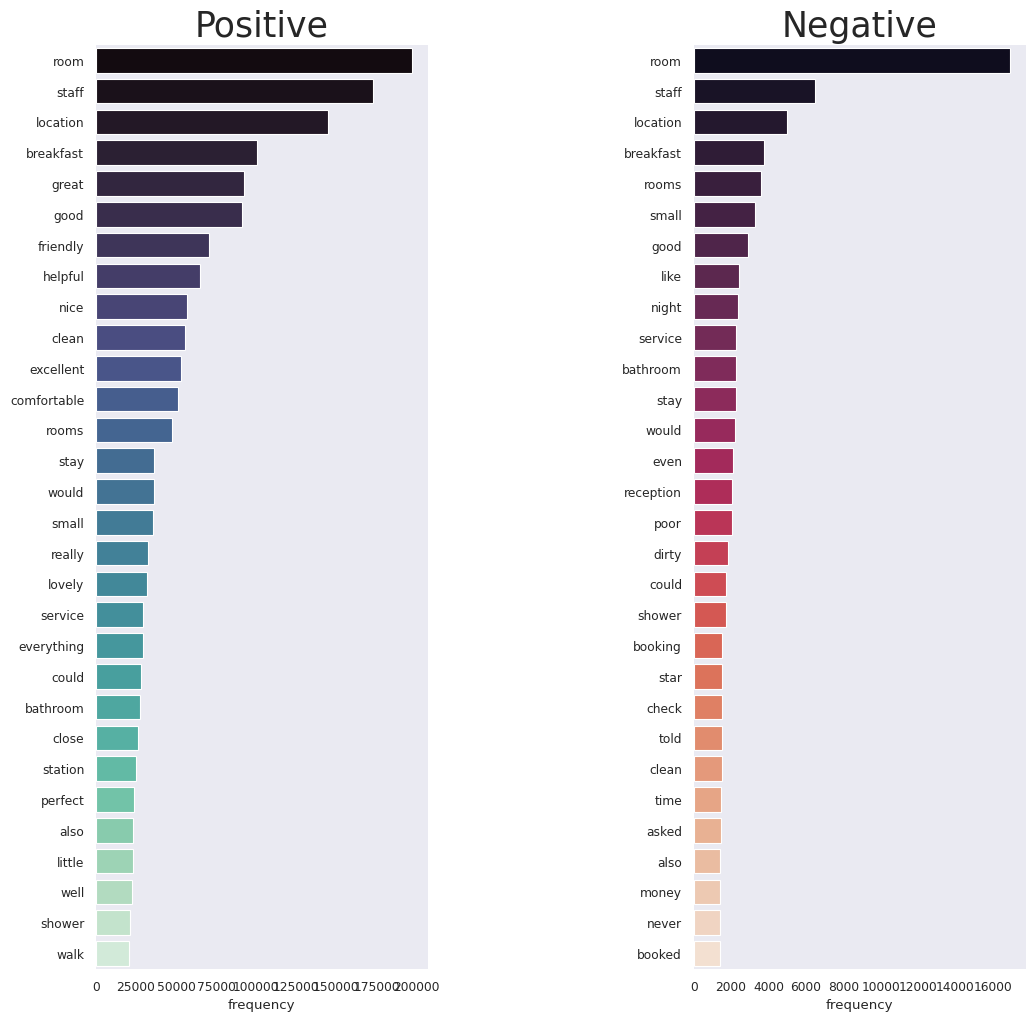

In [ ]:
# word cloud

sns.set_theme(style="dark", context="paper")

# Set up the matplotlib figure
f, ax = plt.subplots(1, 2,
                     figsize=(12,12)
                     )

# Barplot for positive tweets
sns.barplot(x="frequency",
            y="word",
            data=myDFPos,
            palette="mako",
            ax=ax[0]
            )

ax[0].set_title('Positive',fontsize=25)
ax[0].set_ylabel('')

# Barplot for negative tweets
sns.barplot(x="frequency",
            y="word",
            data=myDFNeg,
            palette="rocket",
            ax=ax[1]
            )

ax[1].set_title('Negative',fontsize=25)
ax[1].set_ylabel('')

# Leave some space between subplots
# Try commenting it out
plt.subplots_adjust(wspace=0.8)

# Remove the border line
sns.despine(left=True, bottom=True)

# Save the figure
plt.savefig('conditionalWordFreq.png',
            bbox_inches='tight',
            dpi=400)

# Show nicely in the notebook
plt.show()

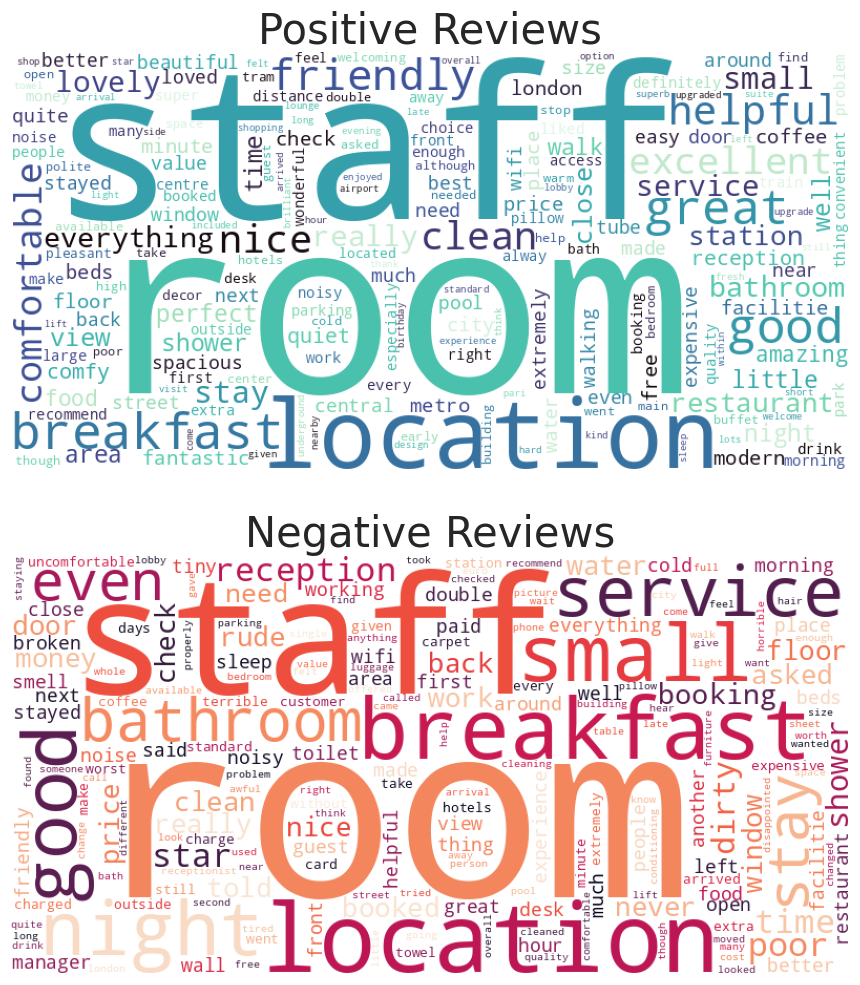

In [ ]:
# world cloud
from wordcloud import WordCloud

# Set up the matplotlib figure
f, ax = plt.subplots(2, 1,
                     figsize=(12,12)
                     )

# Generate a word cloud for postive tweets
myCloudPos = WordCloud(random_state=9165,
                       width=800, height=400,
                       # collocations=True will include 2 words/bigrams
                       collocations=False,
                       background_color='white',
                       colormap='mako'
                       ).generate(myStringPos)

ax[0].imshow(myCloudPos)
ax[0].set_title('Positive Reviews',fontsize=30)
ax[0].set_xlabel('')
ax[0].axis("off")

# Generate a word cloud for negtive tweets
myCloudNeg = WordCloud(random_state=9165,
                       width=800, height=400,
                       # collocations=True will include 2 words/bigrams
                       collocations=False,
                       background_color='white',
                       colormap='rocket'
                       ).generate(myStringNeg)

ax[1].imshow(myCloudNeg)
ax[1].set_title('Negative Reviews',fontsize=30)
ax[1].set_xlabel('')
ax[1].axis("off")

# Save the figure
plt.savefig('conditionalWordcloud.png',
            bbox_inches='tight',
            dpi=400)

# Show nicely in the notebook
plt.show()

In [ ]:
# Prepare the bigram network

# We need networkx
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout


# For positive reviews

# Collect the result
myResultPos = bigramFreqPos.most_common(50)
# Construct the network
G_pos = nx.DiGraph()
# Create connections between nodes
for i in myResultPos:
    G_pos.add_edge(i[0][0], i[0][1], weight=(i[1]))

# For negative reviews

# Collect the result
myResultNeg = bigramFreqNeg.most_common(50)
# Construct the network
G_neg = nx.DiGraph()
# Create connections between nodes
for i in myResultNeg:
    G_neg.add_edge(i[0][0], i[0][1], weight=(i[1]))

<ipython-input-122-48898eac7268>:9: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos_pos = graphviz_layout(G_pos, prog="neato")
<ipython-input-122-48898eac7268>:32: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos_neg = graphviz_layout(G_neg, prog="neato")


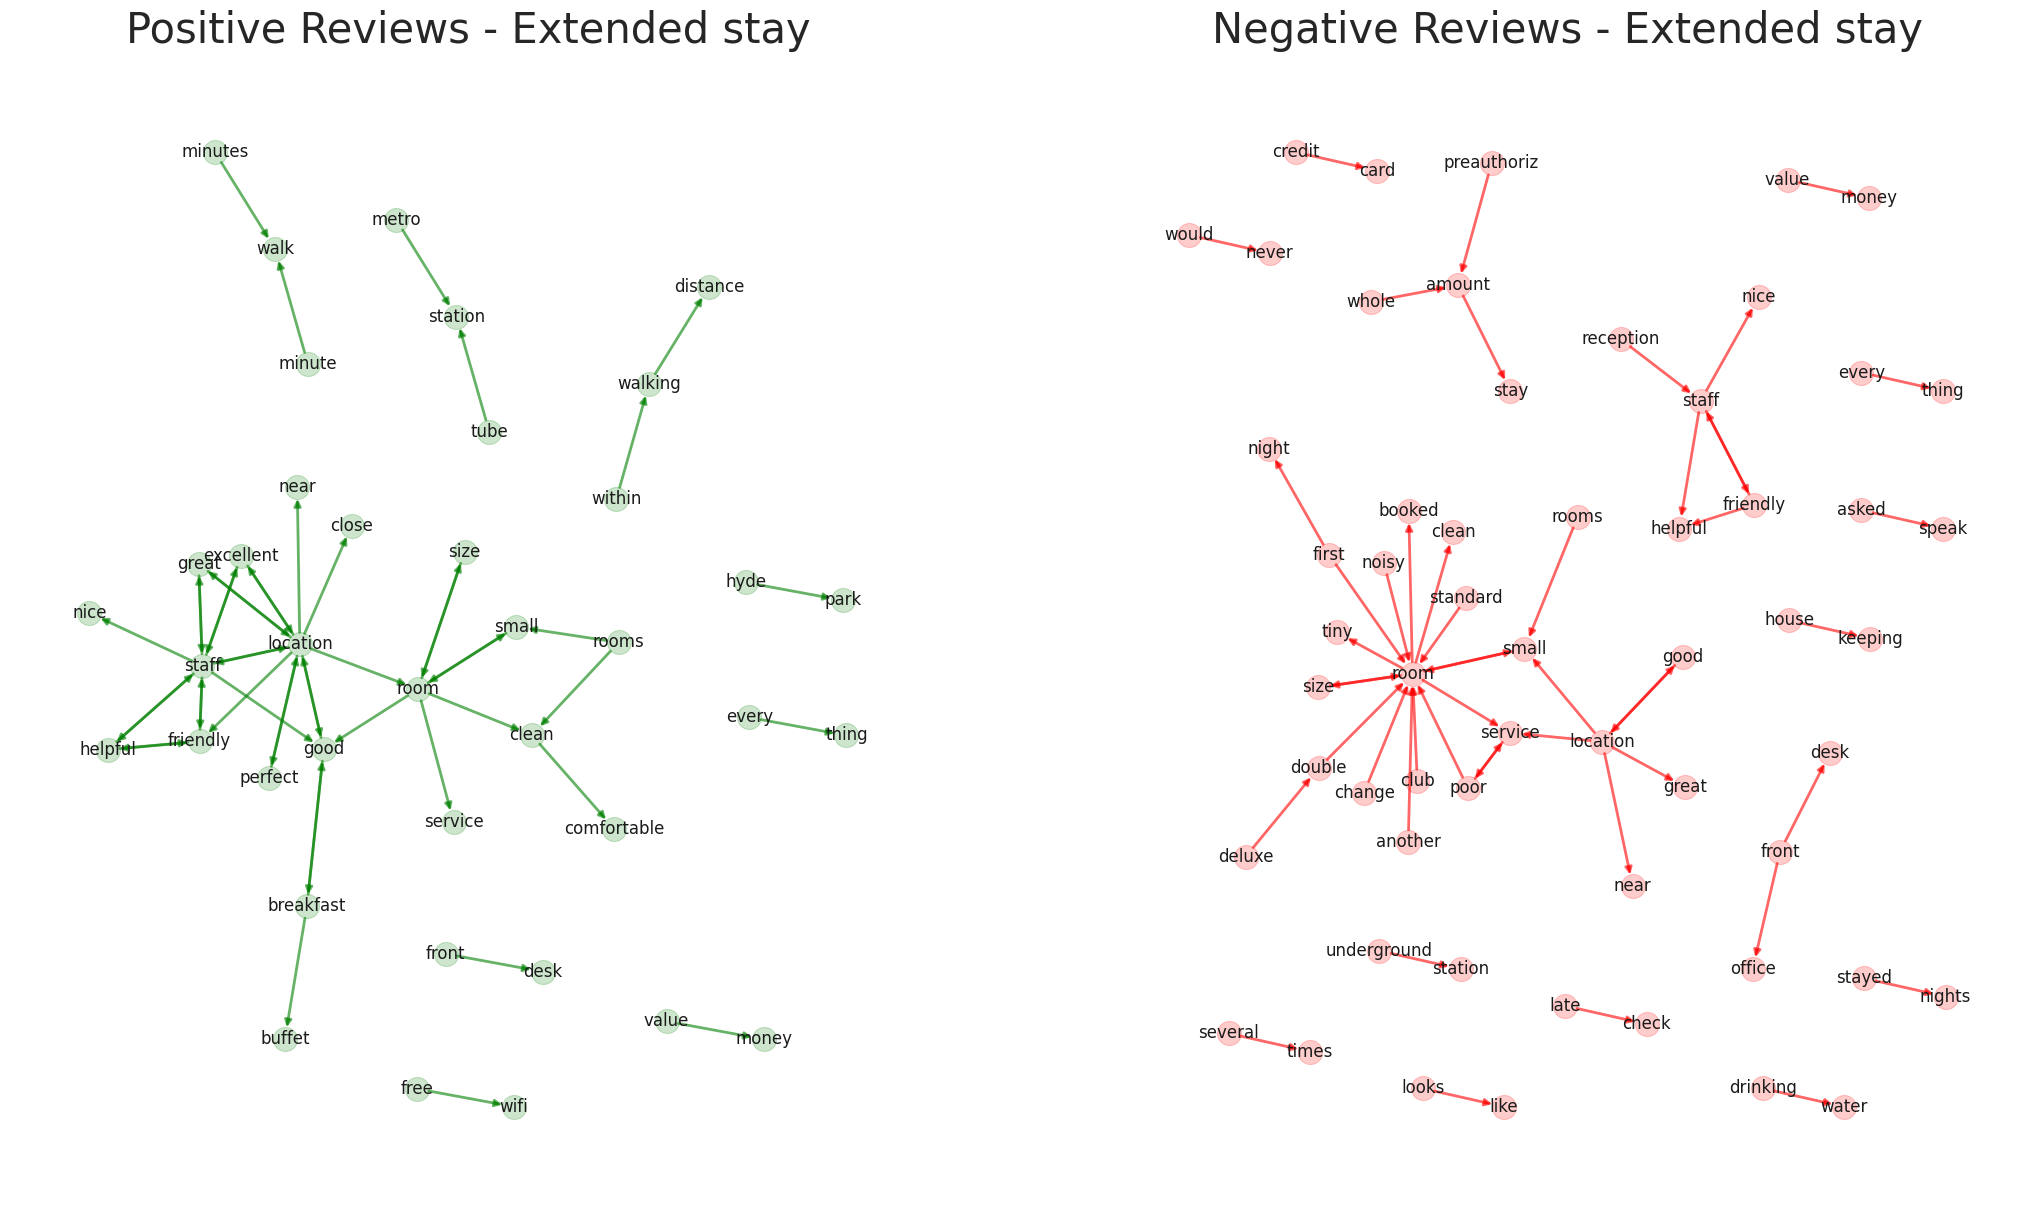

In [ ]:
# set up the figure
f, ax = plt.subplots(1,2,figsize=(26, 15))

# For positive subplot

# use another layout
pos_pos = graphviz_layout(G_pos, prog="neato")

# store the node label information
labels_pos = {}
for node in G_pos.nodes:
    labels_pos[node] = node

# Plot edges
nx.draw_networkx_edges(G_pos, pos_pos, width=2, alpha=0.6, edge_color="green", ax=ax[0])

# Plot nodes
nx.draw_networkx_nodes(G_pos, pos_pos, alpha=0.2, label=True, node_color="green", ax=ax[0])

# Add labels
nx.draw_networkx_labels(G_pos, pos_pos, labels_pos, ax=ax[0])

# Turn off the axis
ax[0].axis("off")
ax[0].set_title('Positive Reviews - Extended stay',fontsize=30)

# For negative subplot

# use another layout
pos_neg = graphviz_layout(G_neg, prog="neato")

# store the node label information
labels_neg = {}
for node in G_neg.nodes:
    labels_neg[node] = node

# Plot edges
nx.draw_networkx_edges(G_neg, pos_neg, width=2, alpha=0.6, edge_color="red", ax=ax[1])

# Plot nodes
nx.draw_networkx_nodes(G_neg, pos_neg, alpha=0.2, label=True, node_color="red", ax=ax[1])

# Add labels
nx.draw_networkx_labels(G_neg, pos_neg, labels_neg, ax=ax[1])

# Turn off the axis
ax[1].axis("off")
ax[1].set_title('Negative Reviews - Extended stay',fontsize=30)

# Save the figure
plt.savefig('directedBigram.png',
            bbox_inches='tight',
            dpi=400)

# Show nicely in the notebook
plt.show()

<ipython-input-117-9a14cbfb04d1>:9: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos_pos = graphviz_layout(G_pos, prog="neato")
<ipython-input-117-9a14cbfb04d1>:32: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos_neg = graphviz_layout(G_neg, prog="neato")


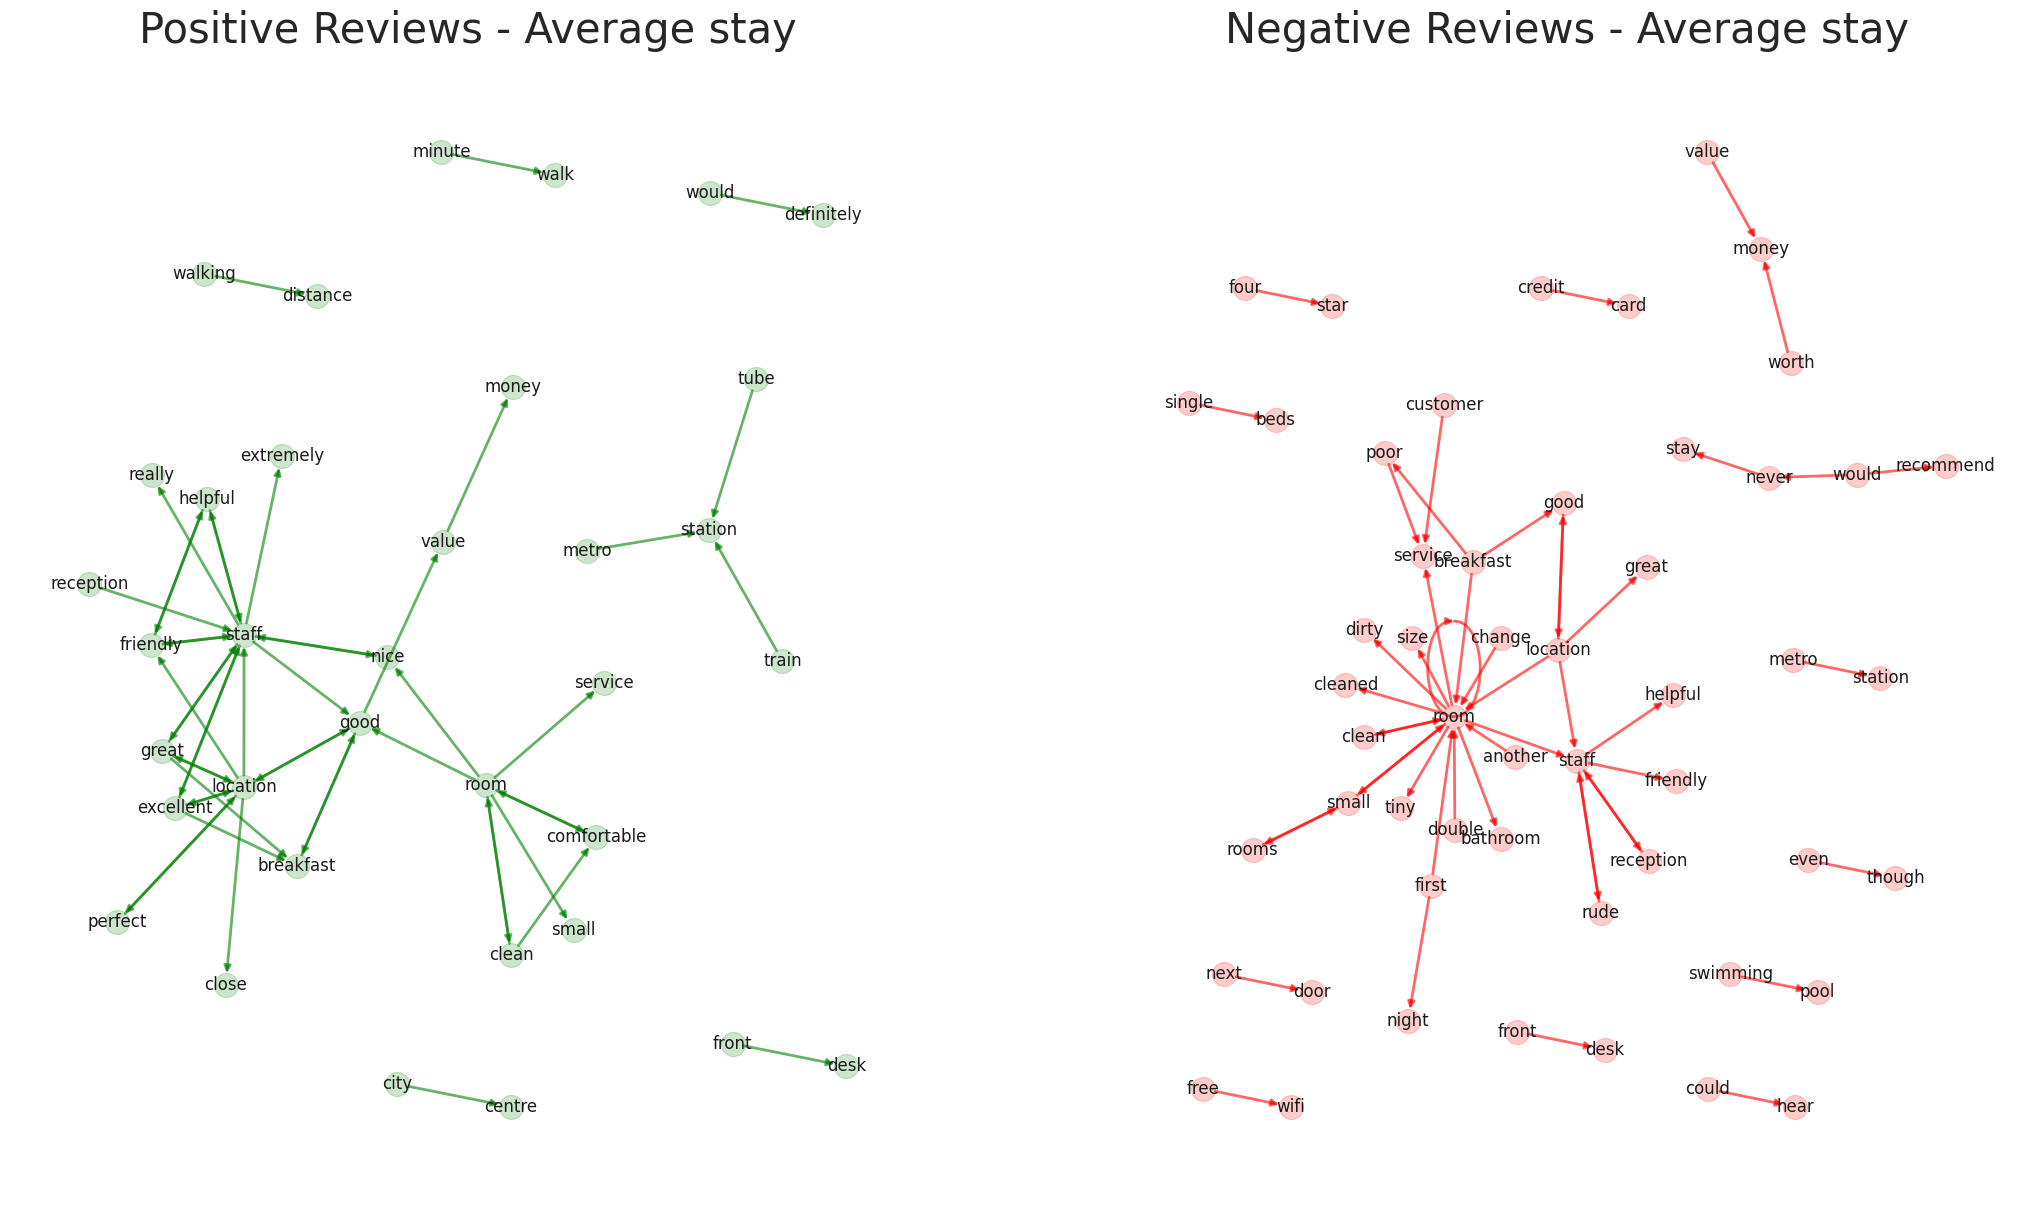

In [ ]:
# set up the figure
f, ax = plt.subplots(1,2,figsize=(26, 15))

# For positive subplot

# use another layout
pos_pos = graphviz_layout(G_pos, prog="neato")

# store the node label information
labels_pos = {}
for node in G_pos.nodes:
    labels_pos[node] = node

# Plot edges
nx.draw_networkx_edges(G_pos, pos_pos, width=2, alpha=0.6, edge_color="green", ax=ax[0])

# Plot nodes
nx.draw_networkx_nodes(G_pos, pos_pos, alpha=0.2, label=True, node_color="green", ax=ax[0])

# Add labels
nx.draw_networkx_labels(G_pos, pos_pos, labels_pos, ax=ax[0])

# Turn off the axis
ax[0].axis("off")
ax[0].set_title('Positive Reviews - Average stay',fontsize=30)

# For negative subplot

# use another layout
pos_neg = graphviz_layout(G_neg, prog="neato")

# store the node label information
labels_neg = {}
for node in G_neg.nodes:
    labels_neg[node] = node

# Plot edges
nx.draw_networkx_edges(G_neg, pos_neg, width=2, alpha=0.6, edge_color="red", ax=ax[1])

# Plot nodes
nx.draw_networkx_nodes(G_neg, pos_neg, alpha=0.2, label=True, node_color="red", ax=ax[1])

# Add labels
nx.draw_networkx_labels(G_neg, pos_neg, labels_neg, ax=ax[1])

# Turn off the axis
ax[1].axis("off")
ax[1].set_title('Negative Reviews - Average stay',fontsize=30)

# Save the figure
plt.savefig('directedBigram.png',
            bbox_inches='tight',
            dpi=400)

# Show nicely in the notebook
plt.show()

<ipython-input-110-e1b006682014>:9: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos_pos = graphviz_layout(G_pos, prog="neato")
<ipython-input-110-e1b006682014>:32: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos_neg = graphviz_layout(G_neg, prog="neato")


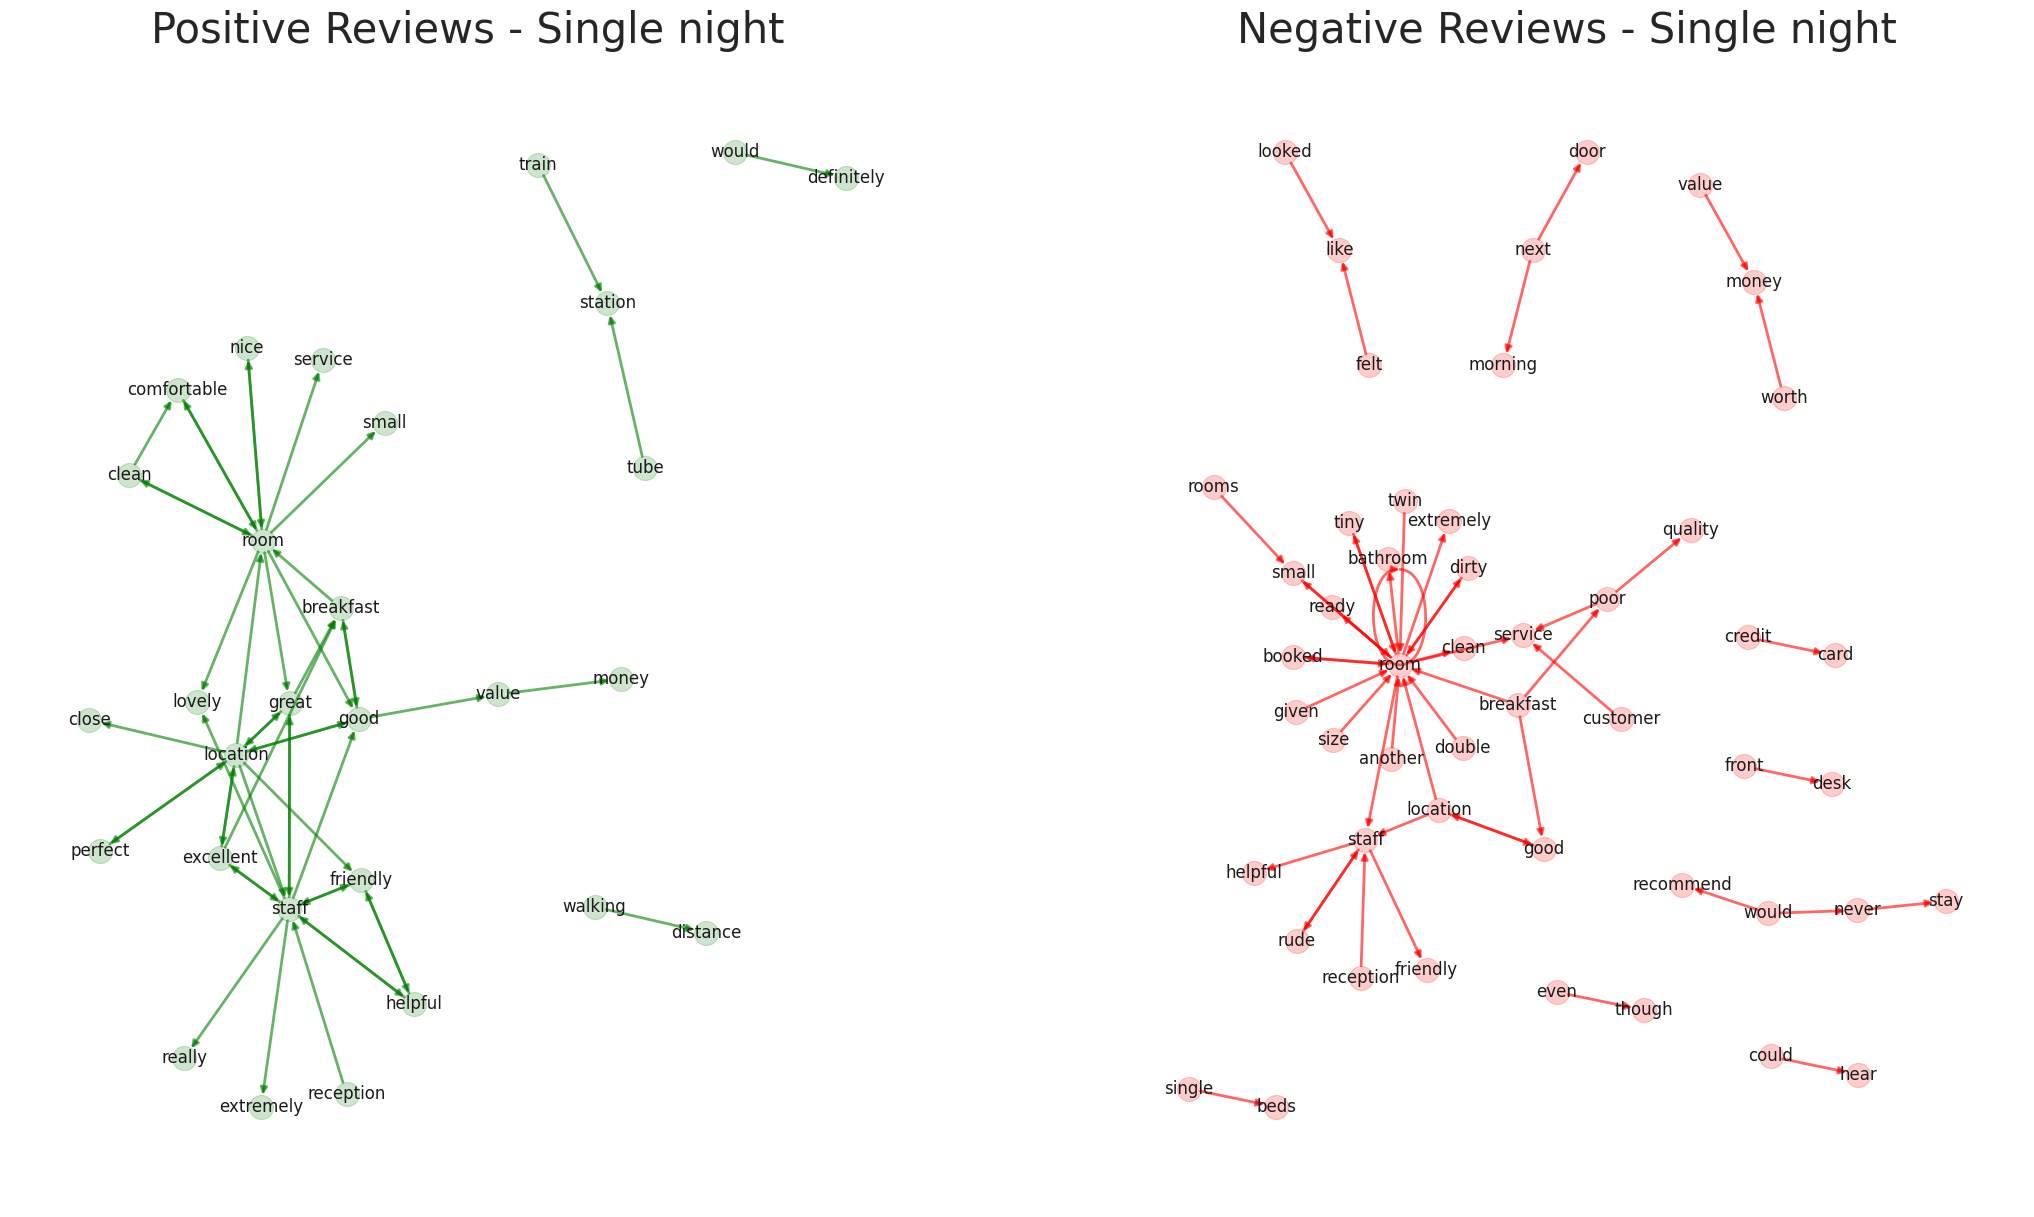

In [ ]:
# set up the figure
f, ax = plt.subplots(1,2,figsize=(26, 15))

# For positive subplot

# use another layout
pos_pos = graphviz_layout(G_pos, prog="neato")

# store the node label information
labels_pos = {}
for node in G_pos.nodes:
    labels_pos[node] = node

# Plot edges
nx.draw_networkx_edges(G_pos, pos_pos, width=2, alpha=0.6, edge_color="green", ax=ax[0])

# Plot nodes
nx.draw_networkx_nodes(G_pos, pos_pos, alpha=0.2, label=True, node_color="green", ax=ax[0])

# Add labels
nx.draw_networkx_labels(G_pos, pos_pos, labels_pos, ax=ax[0])

# Turn off the axis
ax[0].axis("off")
ax[0].set_title('Positive Reviews - Single night',fontsize=30)

# For negative subplot

# use another layout
pos_neg = graphviz_layout(G_neg, prog="neato")

# store the node label information
labels_neg = {}
for node in G_neg.nodes:
    labels_neg[node] = node

# Plot edges
nx.draw_networkx_edges(G_neg, pos_neg, width=2, alpha=0.6, edge_color="red", ax=ax[1])

# Plot nodes
nx.draw_networkx_nodes(G_neg, pos_neg, alpha=0.2, label=True, node_color="red", ax=ax[1])

# Add labels
nx.draw_networkx_labels(G_neg, pos_neg, labels_neg, ax=ax[1])

# Turn off the axis
ax[1].axis("off")
ax[1].set_title('Negative Reviews - Single night',fontsize=30)

# Save the figure
plt.savefig('directedBigram.png',
            bbox_inches='tight',
            dpi=400)

# Show nicely in the notebook
plt.show()

<ipython-input-106-c8c856eea54f>:9: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos_pos = graphviz_layout(G_pos, prog="neato")
<ipython-input-106-c8c856eea54f>:32: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos_neg = graphviz_layout(G_neg, prog="neato")


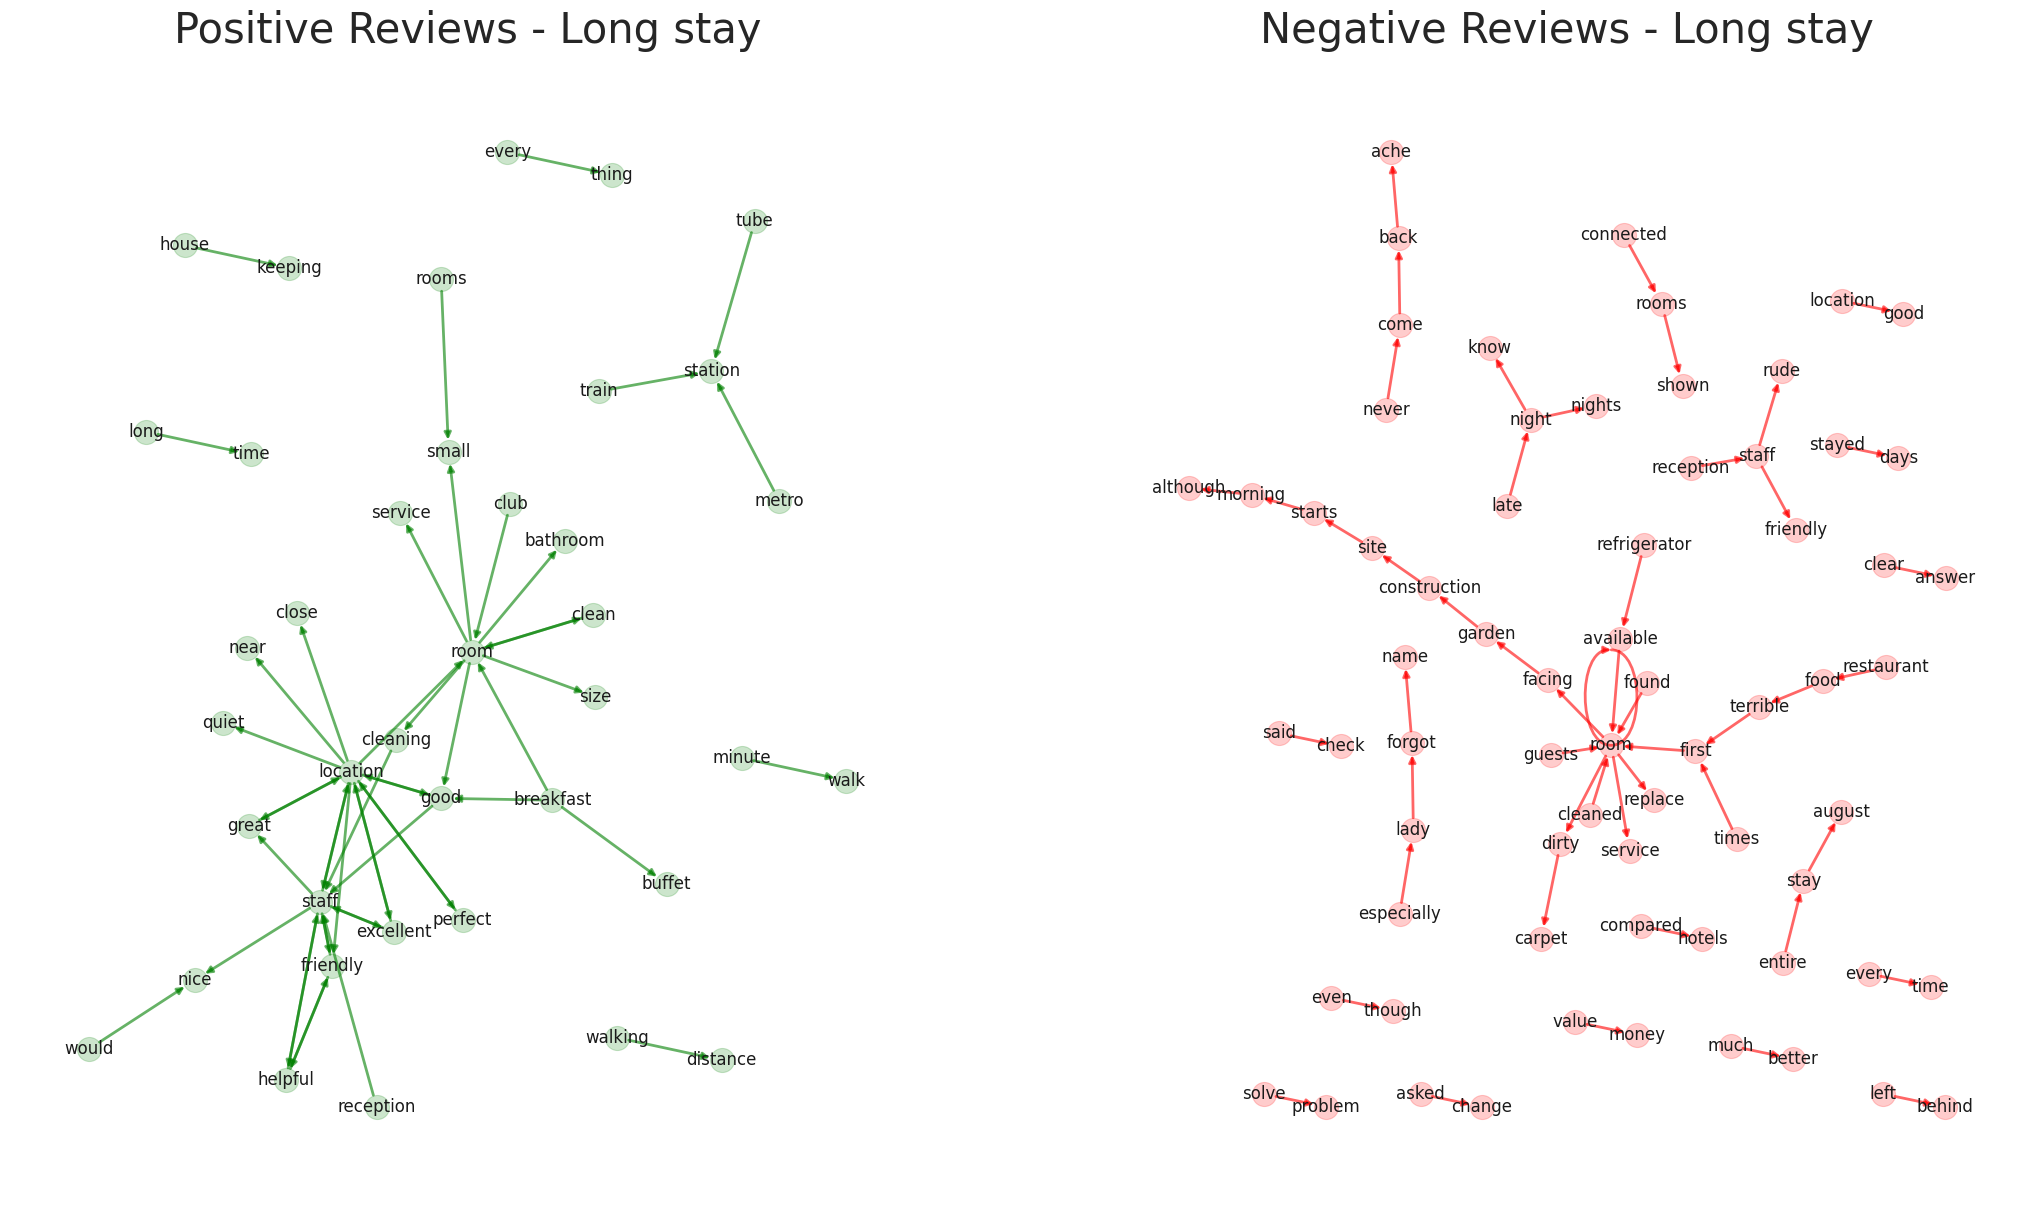

In [ ]:
# set up the figure
f, ax = plt.subplots(1,2,figsize=(26, 15))

# For positive subplot

# use another layout
pos_pos = graphviz_layout(G_pos, prog="neato")

# store the node label information
labels_pos = {}
for node in G_pos.nodes:
    labels_pos[node] = node

# Plot edges
nx.draw_networkx_edges(G_pos, pos_pos, width=2, alpha=0.6, edge_color="green", ax=ax[0])

# Plot nodes
nx.draw_networkx_nodes(G_pos, pos_pos, alpha=0.2, label=True, node_color="green", ax=ax[0])

# Add labels
nx.draw_networkx_labels(G_pos, pos_pos, labels_pos, ax=ax[0])

# Turn off the axis
ax[0].axis("off")
ax[0].set_title('Positive Reviews - Long stay',fontsize=30)

# For negative subplot

# use another layout
pos_neg = graphviz_layout(G_neg, prog="neato")

# store the node label information
labels_neg = {}
for node in G_neg.nodes:
    labels_neg[node] = node

# Plot edges
nx.draw_networkx_edges(G_neg, pos_neg, width=2, alpha=0.6, edge_color="red", ax=ax[1])

# Plot nodes
nx.draw_networkx_nodes(G_neg, pos_neg, alpha=0.2, label=True, node_color="red", ax=ax[1])

# Add labels
nx.draw_networkx_labels(G_neg, pos_neg, labels_neg, ax=ax[1])

# Turn off the axis
ax[1].axis("off")
ax[1].set_title('Negative Reviews - Long stay',fontsize=30)

# Save the figure
plt.savefig('directedBigram.png',
            bbox_inches='tight',
            dpi=400)

# Show nicely in the notebook
plt.show()

<ipython-input-81-45e2bec25b9a>:9: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos_pos = graphviz_layout(G_pos, prog="neato")
<ipython-input-81-45e2bec25b9a>:32: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos_neg = graphviz_layout(G_neg, prog="neato")


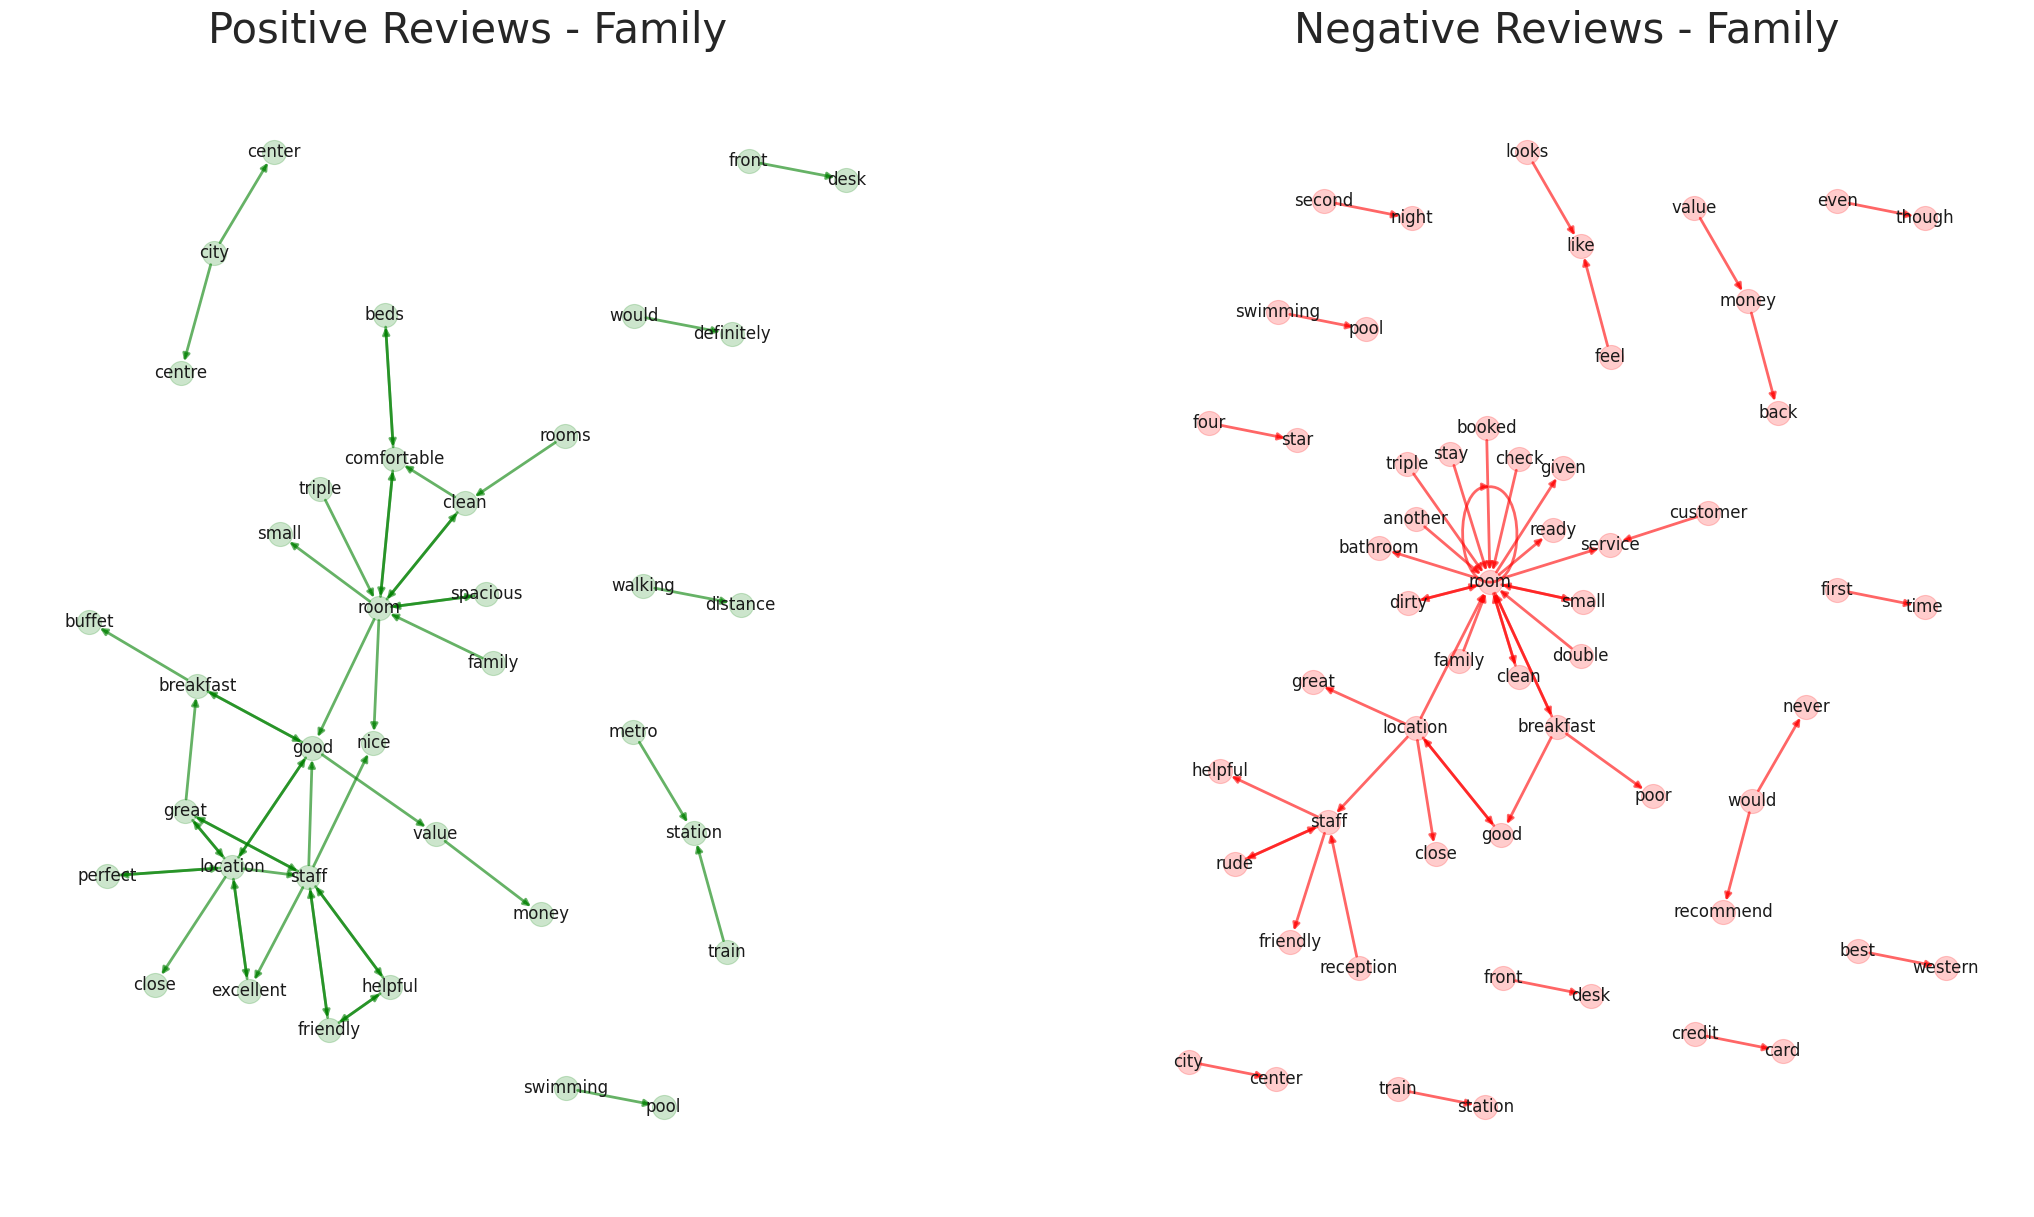

In [ ]:
# set up the figure
f, ax = plt.subplots(1,2,figsize=(26, 15))

# For positive subplot

# use another layout
pos_pos = graphviz_layout(G_pos, prog="neato")

# store the node label information
labels_pos = {}
for node in G_pos.nodes:
    labels_pos[node] = node

# Plot edges
nx.draw_networkx_edges(G_pos, pos_pos, width=2, alpha=0.6, edge_color="green", ax=ax[0])

# Plot nodes
nx.draw_networkx_nodes(G_pos, pos_pos, alpha=0.2, label=True, node_color="green", ax=ax[0])

# Add labels
nx.draw_networkx_labels(G_pos, pos_pos, labels_pos, ax=ax[0])

# Turn off the axis
ax[0].axis("off")
ax[0].set_title('Positive Reviews - Family',fontsize=30)

# For negative subplot

# use another layout
pos_neg = graphviz_layout(G_neg, prog="neato")

# store the node label information
labels_neg = {}
for node in G_neg.nodes:
    labels_neg[node] = node

# Plot edges
nx.draw_networkx_edges(G_neg, pos_neg, width=2, alpha=0.6, edge_color="red", ax=ax[1])

# Plot nodes
nx.draw_networkx_nodes(G_neg, pos_neg, alpha=0.2, label=True, node_color="red", ax=ax[1])

# Add labels
nx.draw_networkx_labels(G_neg, pos_neg, labels_neg, ax=ax[1])

# Turn off the axis
ax[1].axis("off")
ax[1].set_title('Negative Reviews - Family',fontsize=30)

# Save the figure
plt.savefig('directedBigram.png',
            bbox_inches='tight',
            dpi=400)

# Show nicely in the notebook
plt.show()

<ipython-input-76-68cbdbd364d9>:9: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos_pos = graphviz_layout(G_pos, prog="neato")
<ipython-input-76-68cbdbd364d9>:32: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos_neg = graphviz_layout(G_neg, prog="neato")


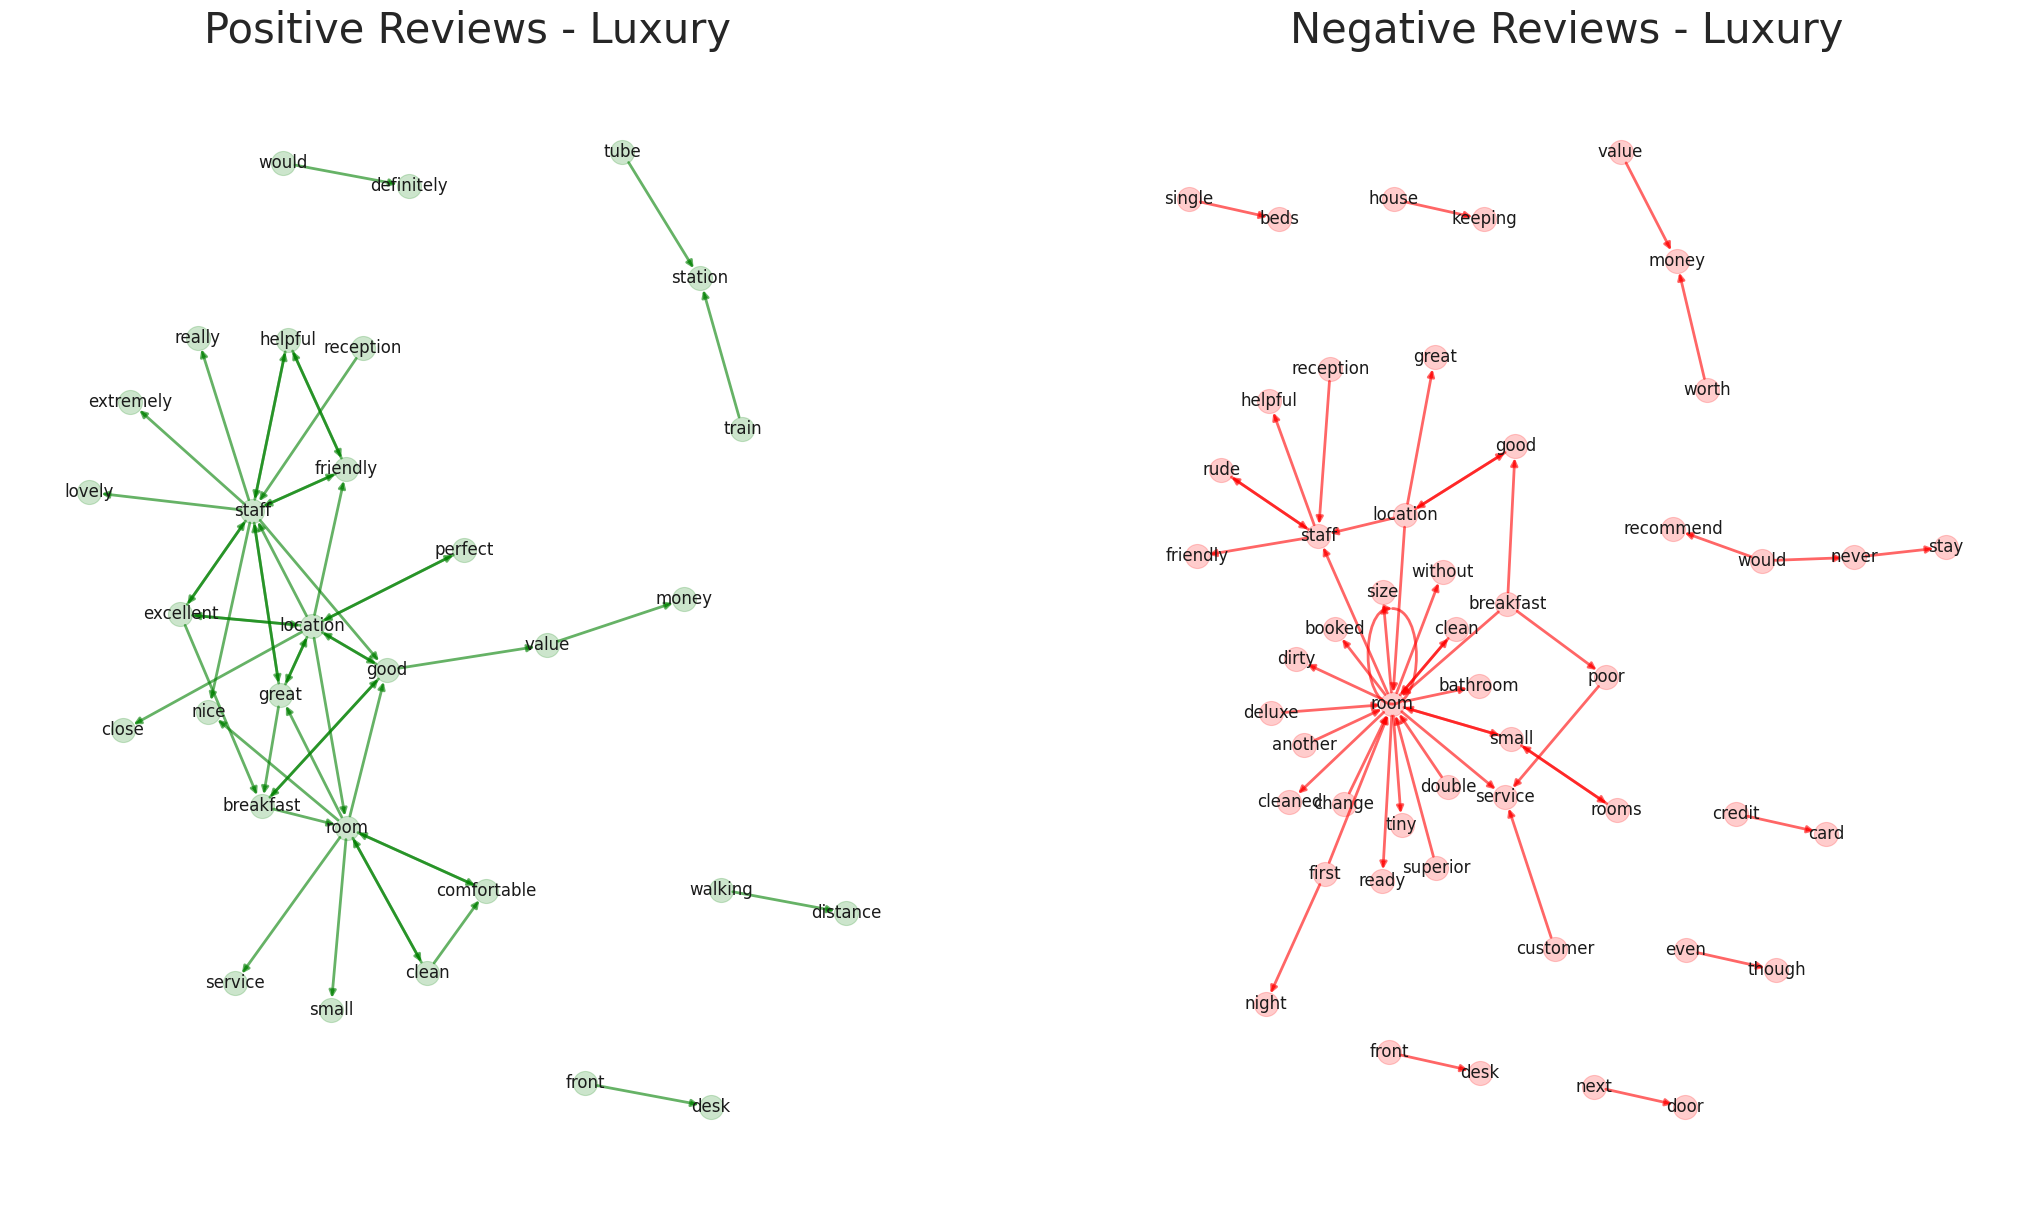

In [ ]:
# set up the figure
f, ax = plt.subplots(1,2,figsize=(26, 15))

# For positive subplot

# use another layout
pos_pos = graphviz_layout(G_pos, prog="neato")

# store the node label information
labels_pos = {}
for node in G_pos.nodes:
    labels_pos[node] = node

# Plot edges
nx.draw_networkx_edges(G_pos, pos_pos, width=2, alpha=0.6, edge_color="green", ax=ax[0])

# Plot nodes
nx.draw_networkx_nodes(G_pos, pos_pos, alpha=0.2, label=True, node_color="green", ax=ax[0])

# Add labels
nx.draw_networkx_labels(G_pos, pos_pos, labels_pos, ax=ax[0])

# Turn off the axis
ax[0].axis("off")
ax[0].set_title('Positive Reviews - Luxury',fontsize=30)

# For negative subplot

# use another layout
pos_neg = graphviz_layout(G_neg, prog="neato")

# store the node label information
labels_neg = {}
for node in G_neg.nodes:
    labels_neg[node] = node

# Plot edges
nx.draw_networkx_edges(G_neg, pos_neg, width=2, alpha=0.6, edge_color="red", ax=ax[1])

# Plot nodes
nx.draw_networkx_nodes(G_neg, pos_neg, alpha=0.2, label=True, node_color="red", ax=ax[1])

# Add labels
nx.draw_networkx_labels(G_neg, pos_neg, labels_neg, ax=ax[1])

# Turn off the axis
ax[1].axis("off")
ax[1].set_title('Negative Reviews - Luxury',fontsize=30)

# Save the figure
plt.savefig('directedBigram.png',
            bbox_inches='tight',
            dpi=400)

# Show nicely in the notebook
plt.show()

<ipython-input-72-459b40f2ee29>:9: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos_pos = graphviz_layout(G_pos, prog="neato")
<ipython-input-72-459b40f2ee29>:32: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos_neg = graphviz_layout(G_neg, prog="neato")


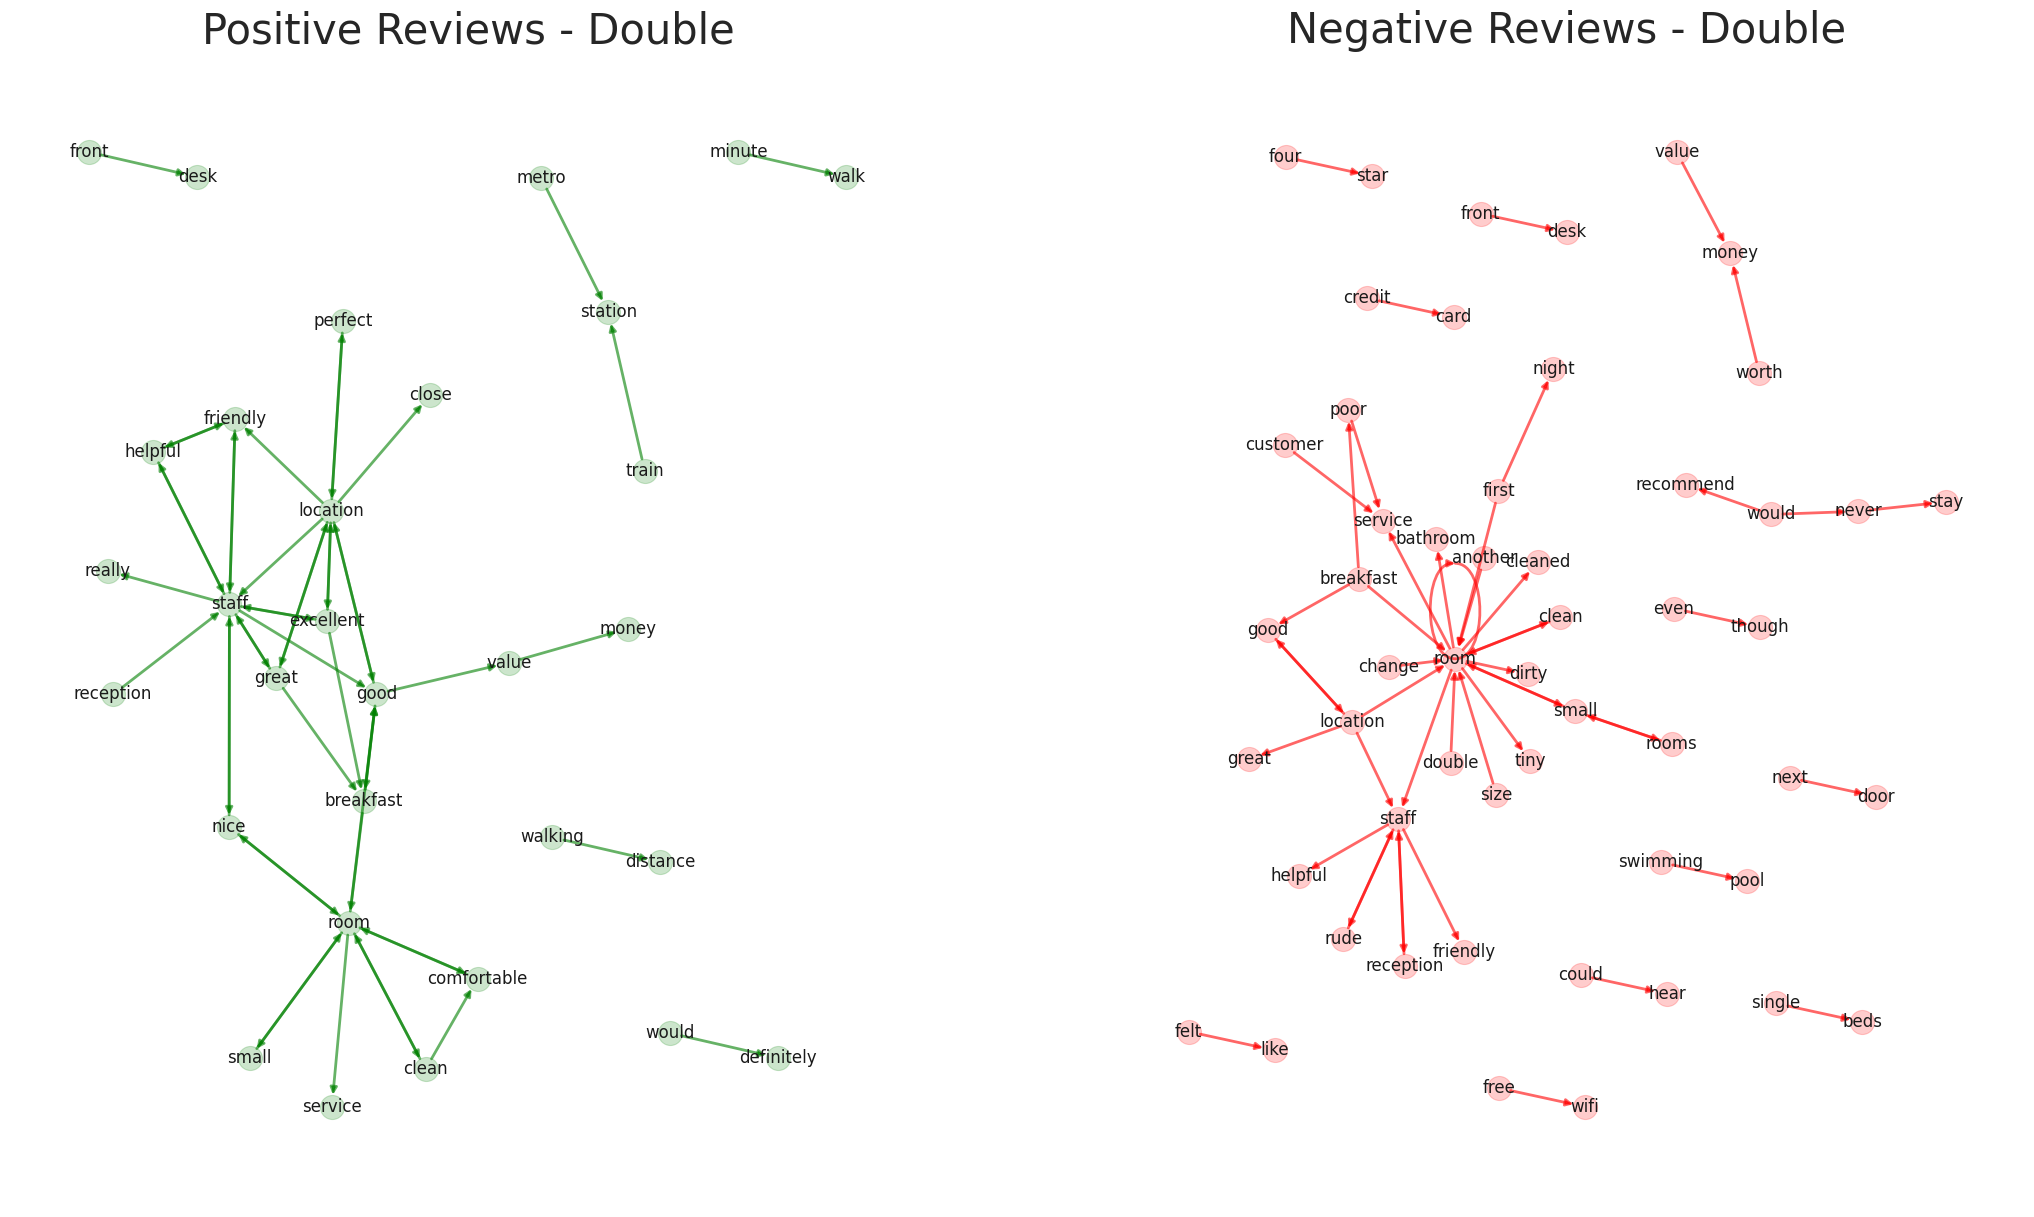

In [ ]:
# set up the figure
f, ax = plt.subplots(1,2,figsize=(26, 15))

# For positive subplot

# use another layout
pos_pos = graphviz_layout(G_pos, prog="neato")

# store the node label information
labels_pos = {}
for node in G_pos.nodes:
    labels_pos[node] = node

# Plot edges
nx.draw_networkx_edges(G_pos, pos_pos, width=2, alpha=0.6, edge_color="green", ax=ax[0])

# Plot nodes
nx.draw_networkx_nodes(G_pos, pos_pos, alpha=0.2, label=True, node_color="green", ax=ax[0])

# Add labels
nx.draw_networkx_labels(G_pos, pos_pos, labels_pos, ax=ax[0])

# Turn off the axis
ax[0].axis("off")
ax[0].set_title('Positive Reviews - Double',fontsize=30)

# For negative subplot

# use another layout
pos_neg = graphviz_layout(G_neg, prog="neato")

# store the node label information
labels_neg = {}
for node in G_neg.nodes:
    labels_neg[node] = node

# Plot edges
nx.draw_networkx_edges(G_neg, pos_neg, width=2, alpha=0.6, edge_color="red", ax=ax[1])

# Plot nodes
nx.draw_networkx_nodes(G_neg, pos_neg, alpha=0.2, label=True, node_color="red", ax=ax[1])

# Add labels
nx.draw_networkx_labels(G_neg, pos_neg, labels_neg, ax=ax[1])

# Turn off the axis
ax[1].axis("off")
ax[1].set_title('Negative Reviews - Double',fontsize=30)

# Save the figure
plt.savefig('directedBigram.png',
            bbox_inches='tight',
            dpi=400)

# Show nicely in the notebook
plt.show()

<ipython-input-66-e602a788607e>:9: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos_pos = graphviz_layout(G_pos, prog="neato")
<ipython-input-66-e602a788607e>:32: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos_neg = graphviz_layout(G_neg, prog="neato")


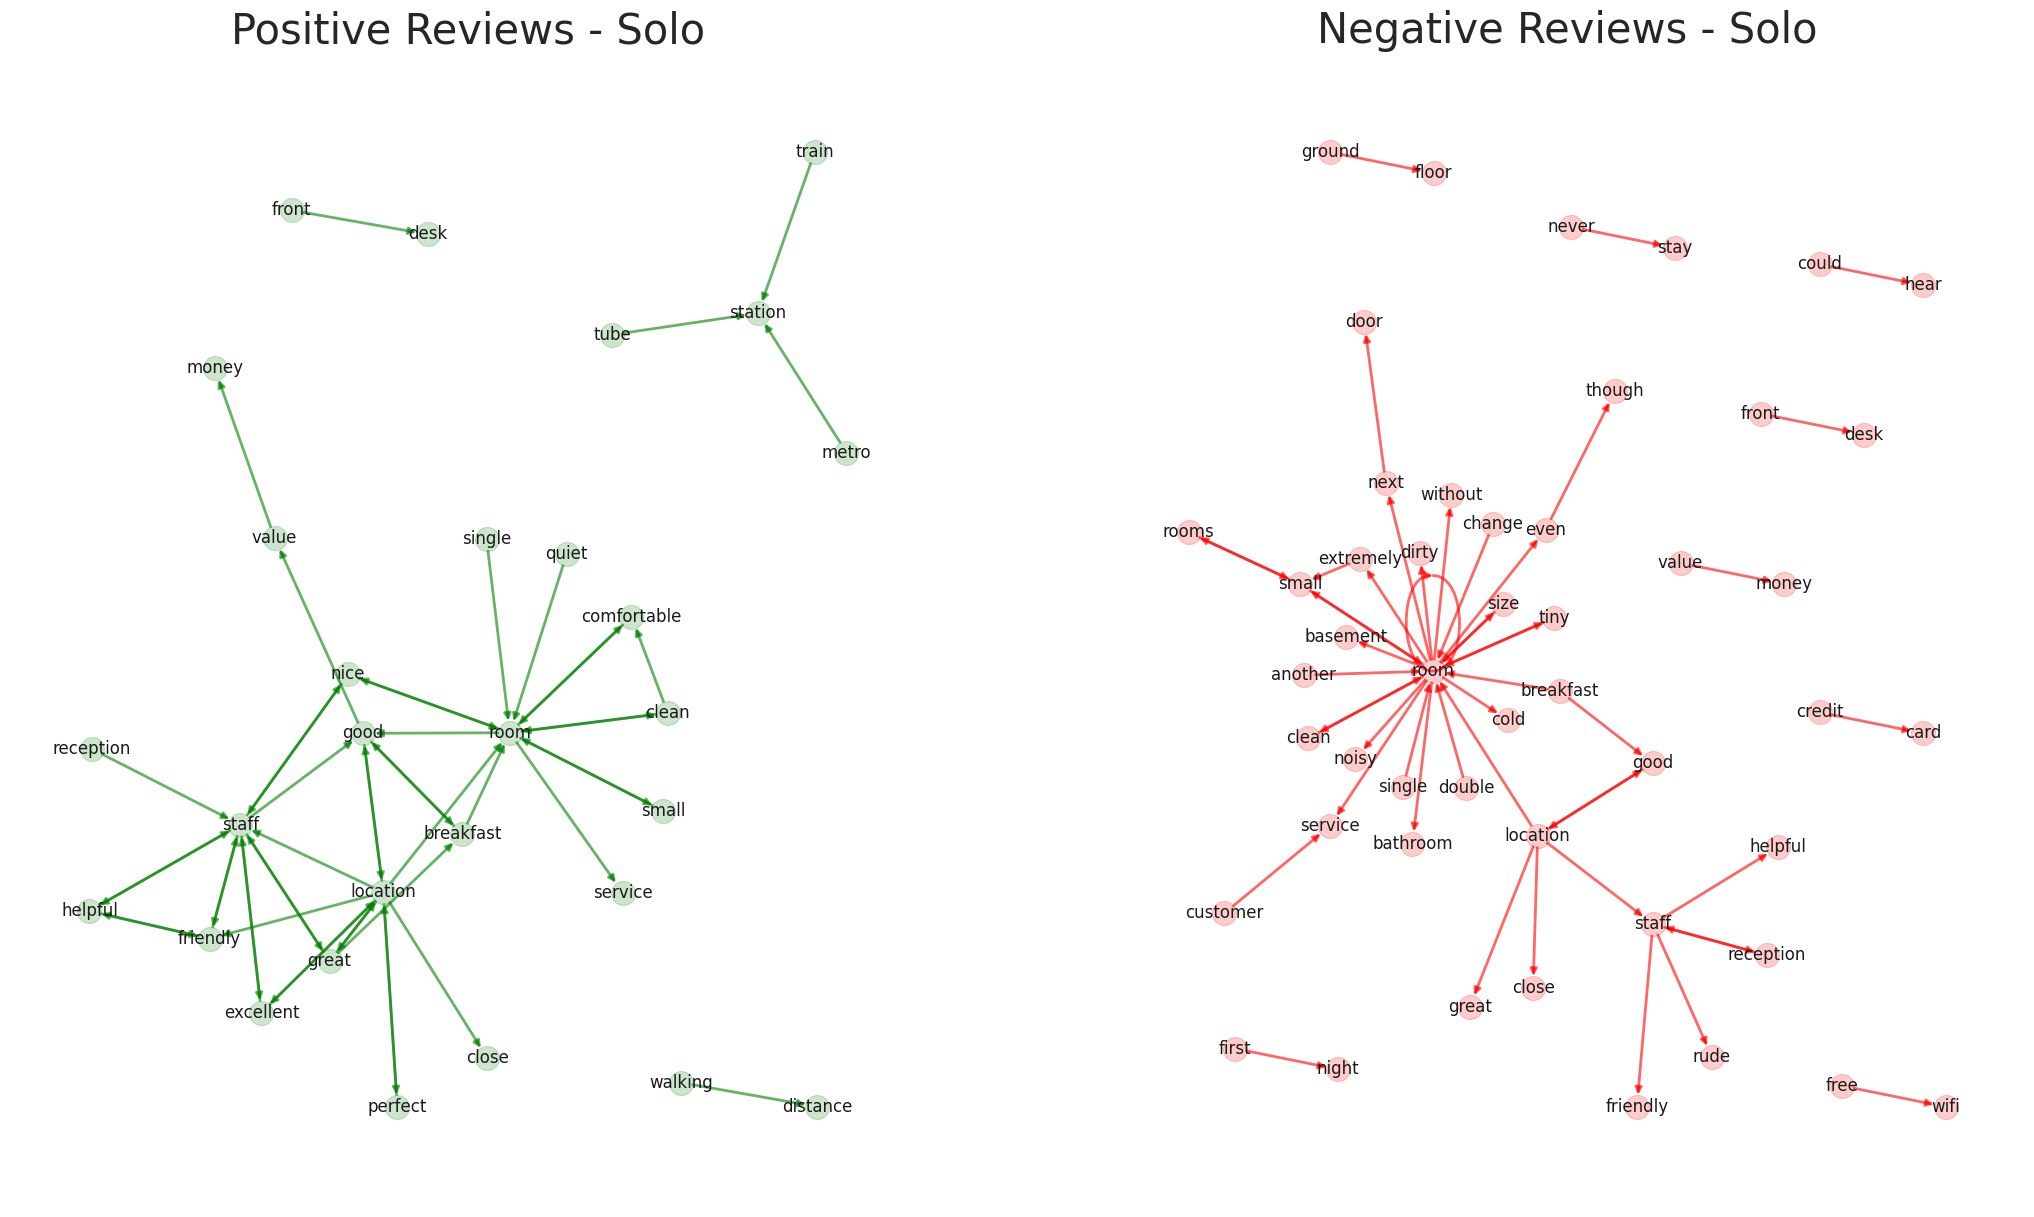

In [ ]:
# set up the figure
f, ax = plt.subplots(1,2,figsize=(26, 15))

# For positive subplot

# use another layout
pos_pos = graphviz_layout(G_pos, prog="neato")

# store the node label information
labels_pos = {}
for node in G_pos.nodes:
    labels_pos[node] = node

# Plot edges
nx.draw_networkx_edges(G_pos, pos_pos, width=2, alpha=0.6, edge_color="green", ax=ax[0])

# Plot nodes
nx.draw_networkx_nodes(G_pos, pos_pos, alpha=0.2, label=True, node_color="green", ax=ax[0])

# Add labels
nx.draw_networkx_labels(G_pos, pos_pos, labels_pos, ax=ax[0])

# Turn off the axis
ax[0].axis("off")
ax[0].set_title('Positive Reviews - Solo',fontsize=30)

# For negative subplot

# use another layout
pos_neg = graphviz_layout(G_neg, prog="neato")

# store the node label information
labels_neg = {}
for node in G_neg.nodes:
    labels_neg[node] = node

# Plot edges
nx.draw_networkx_edges(G_neg, pos_neg, width=2, alpha=0.6, edge_color="red", ax=ax[1])

# Plot nodes
nx.draw_networkx_nodes(G_neg, pos_neg, alpha=0.2, label=True, node_color="red", ax=ax[1])

# Add labels
nx.draw_networkx_labels(G_neg, pos_neg, labels_neg, ax=ax[1])

# Turn off the axis
ax[1].axis("off")
ax[1].set_title('Negative Reviews - Solo',fontsize=30)

# Save the figure
plt.savefig('directedBigram.png',
            bbox_inches='tight',
            dpi=400)

# Show nicely in the notebook
plt.show()

<ipython-input-52-f43fd04b7099>:9: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos_pos = graphviz_layout(G_pos, prog="neato")
<ipython-input-52-f43fd04b7099>:32: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos_neg = graphviz_layout(G_neg, prog="neato")


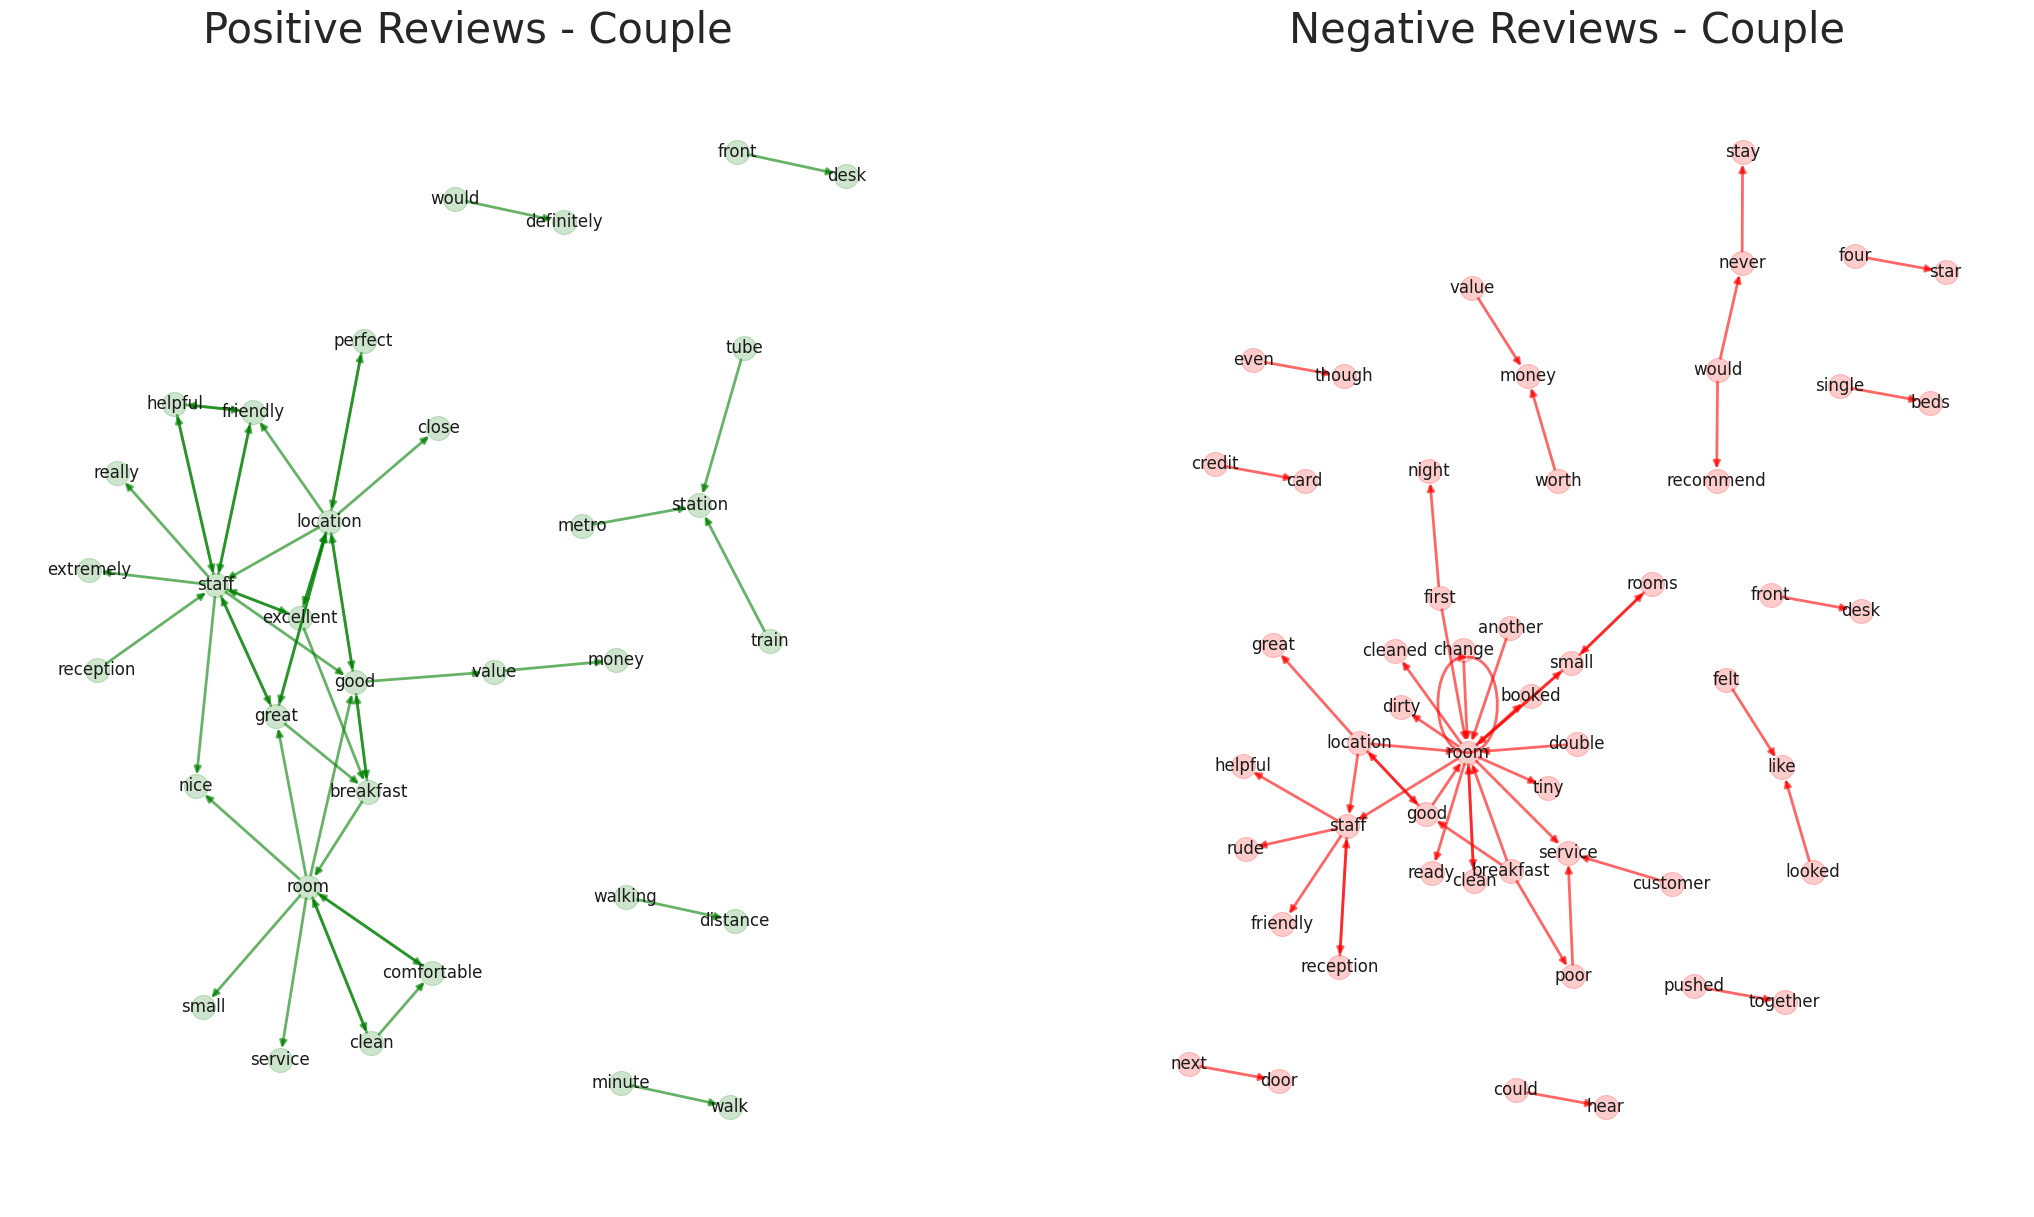

In [ ]:
# set up the figure
f, ax = plt.subplots(1,2,figsize=(26, 15))

# For positive subplot

# use another layout
pos_pos = graphviz_layout(G_pos, prog="neato")

# store the node label information
labels_pos = {}
for node in G_pos.nodes:
    labels_pos[node] = node

# Plot edges
nx.draw_networkx_edges(G_pos, pos_pos, width=2, alpha=0.6, edge_color="green", ax=ax[0])

# Plot nodes
nx.draw_networkx_nodes(G_pos, pos_pos, alpha=0.2, label=True, node_color="green", ax=ax[0])

# Add labels
nx.draw_networkx_labels(G_pos, pos_pos, labels_pos, ax=ax[0])

# Turn off the axis
ax[0].axis("off")
ax[0].set_title('Positive Reviews - Couple',fontsize=30)

# For negative subplot

# use another layout
pos_neg = graphviz_layout(G_neg, prog="neato")

# store the node label information
labels_neg = {}
for node in G_neg.nodes:
    labels_neg[node] = node

# Plot edges
nx.draw_networkx_edges(G_neg, pos_neg, width=2, alpha=0.6, edge_color="red", ax=ax[1])

# Plot nodes
nx.draw_networkx_nodes(G_neg, pos_neg, alpha=0.2, label=True, node_color="red", ax=ax[1])

# Add labels
nx.draw_networkx_labels(G_neg, pos_neg, labels_neg, ax=ax[1])

# Turn off the axis
ax[1].axis("off")
ax[1].set_title('Negative Reviews - Couple',fontsize=30)

# Save the figure
plt.savefig('directedBigram.png',
            bbox_inches='tight',
            dpi=400)

# Show nicely in the notebook
plt.show()

<ipython-input-43-96d8f316b657>:9: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos_pos = graphviz_layout(G_pos, prog="neato")
<ipython-input-43-96d8f316b657>:32: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos_neg = graphviz_layout(G_neg, prog="neato")


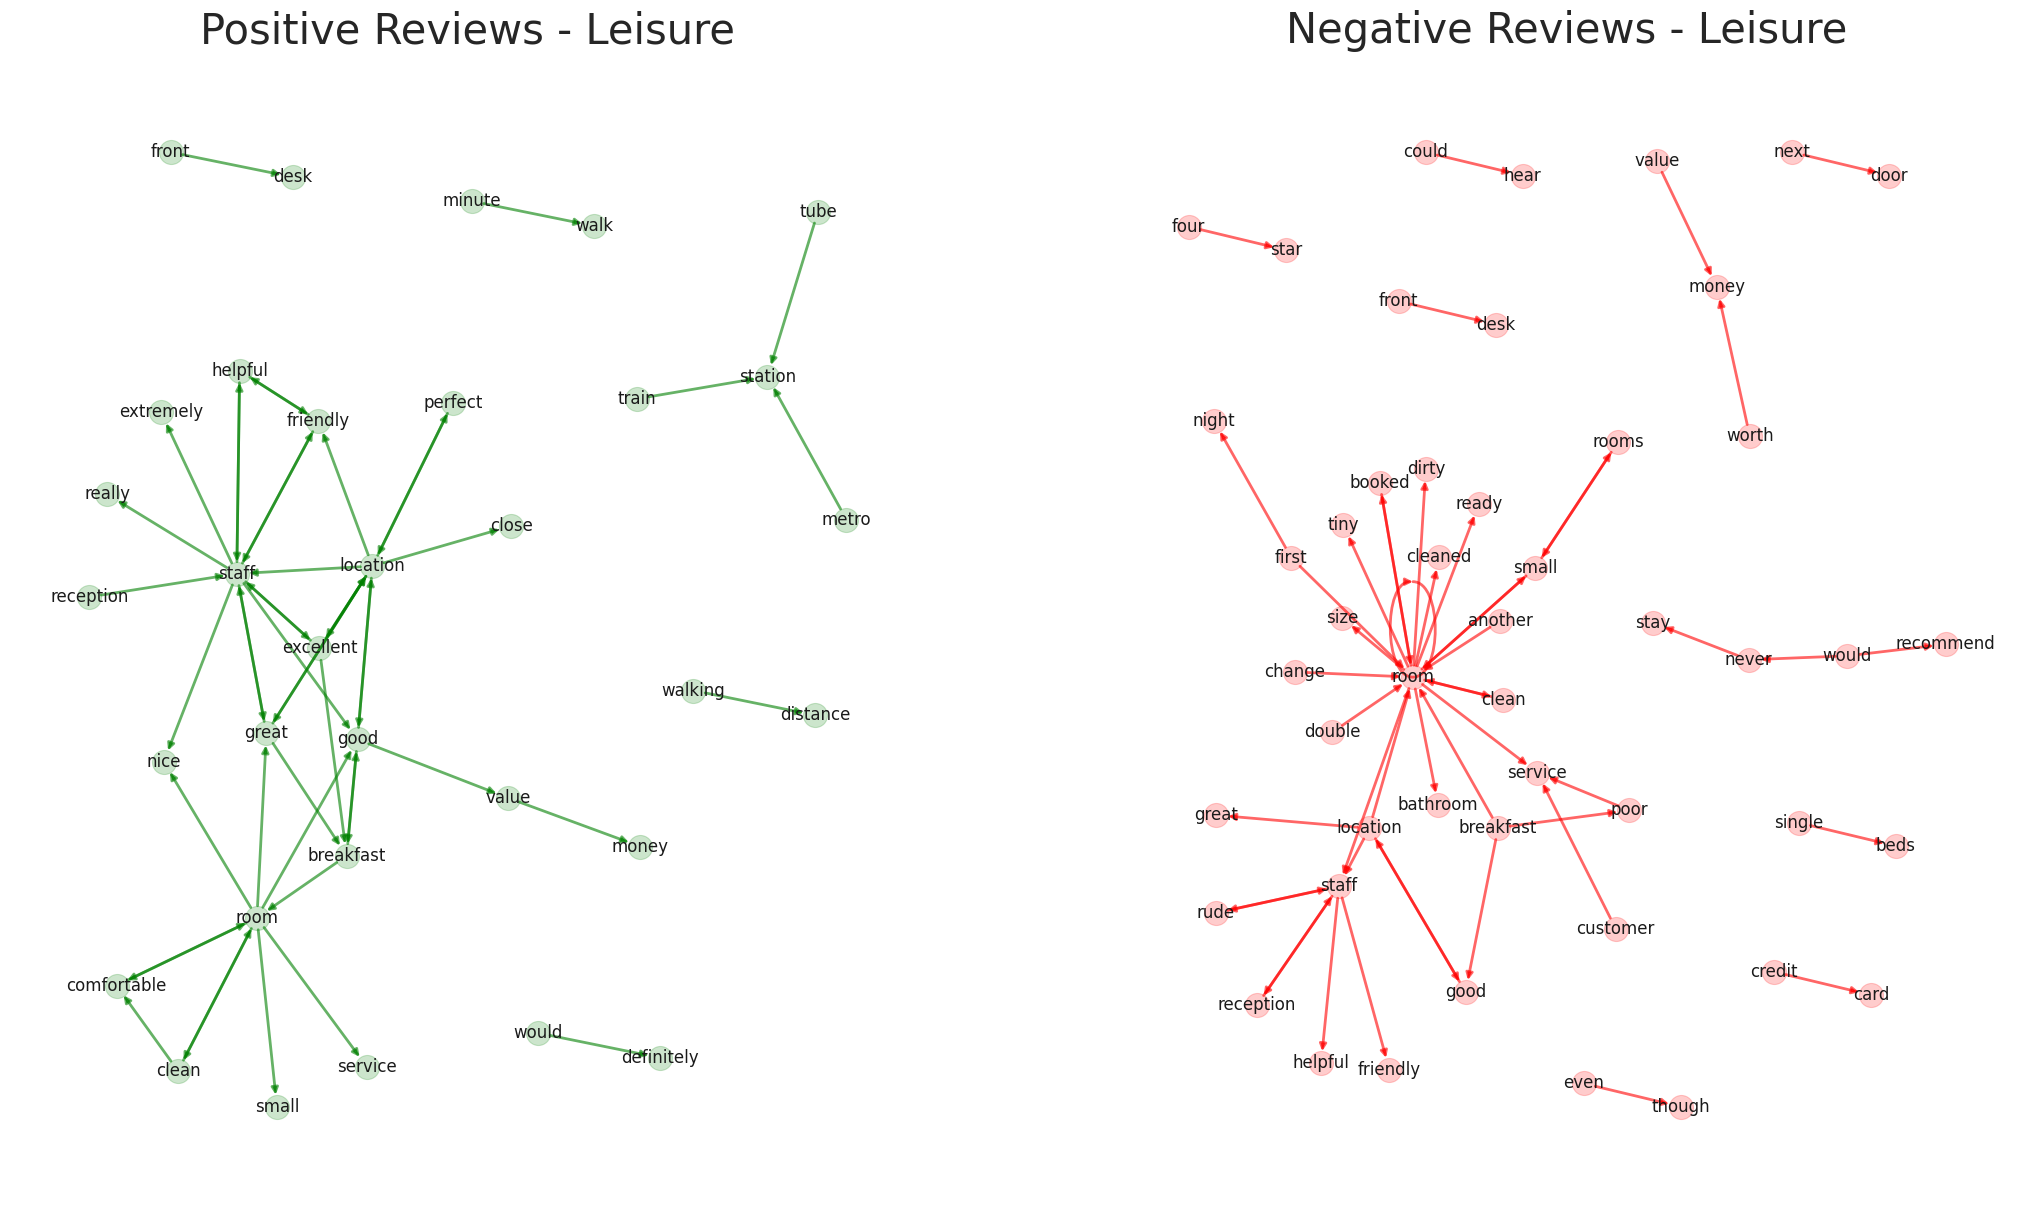

In [ ]:
# set up the figure
f, ax = plt.subplots(1,2,figsize=(26, 15))

# For positive subplot

# use another layout
pos_pos = graphviz_layout(G_pos, prog="neato")

# store the node label information
labels_pos = {}
for node in G_pos.nodes:
    labels_pos[node] = node

# Plot edges
nx.draw_networkx_edges(G_pos, pos_pos, width=2, alpha=0.6, edge_color="green", ax=ax[0])

# Plot nodes
nx.draw_networkx_nodes(G_pos, pos_pos, alpha=0.2, label=True, node_color="green", ax=ax[0])

# Add labels
nx.draw_networkx_labels(G_pos, pos_pos, labels_pos, ax=ax[0])

# Turn off the axis
ax[0].axis("off")
ax[0].set_title('Positive Reviews - Leisure',fontsize=30)

# For negative subplot

# use another layout
pos_neg = graphviz_layout(G_neg, prog="neato")

# store the node label information
labels_neg = {}
for node in G_neg.nodes:
    labels_neg[node] = node

# Plot edges
nx.draw_networkx_edges(G_neg, pos_neg, width=2, alpha=0.6, edge_color="red", ax=ax[1])

# Plot nodes
nx.draw_networkx_nodes(G_neg, pos_neg, alpha=0.2, label=True, node_color="red", ax=ax[1])

# Add labels
nx.draw_networkx_labels(G_neg, pos_neg, labels_neg, ax=ax[1])

# Turn off the axis
ax[1].axis("off")
ax[1].set_title('Negative Reviews - Leisure',fontsize=30)

# Save the figure
plt.savefig('directedBigram.png',
            bbox_inches='tight',
            dpi=400)

# Show nicely in the notebook
plt.show()

<ipython-input-48-6148ce351fc7>:9: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos_pos = graphviz_layout(G_pos, prog="neato")
<ipython-input-48-6148ce351fc7>:32: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos_neg = graphviz_layout(G_neg, prog="neato")


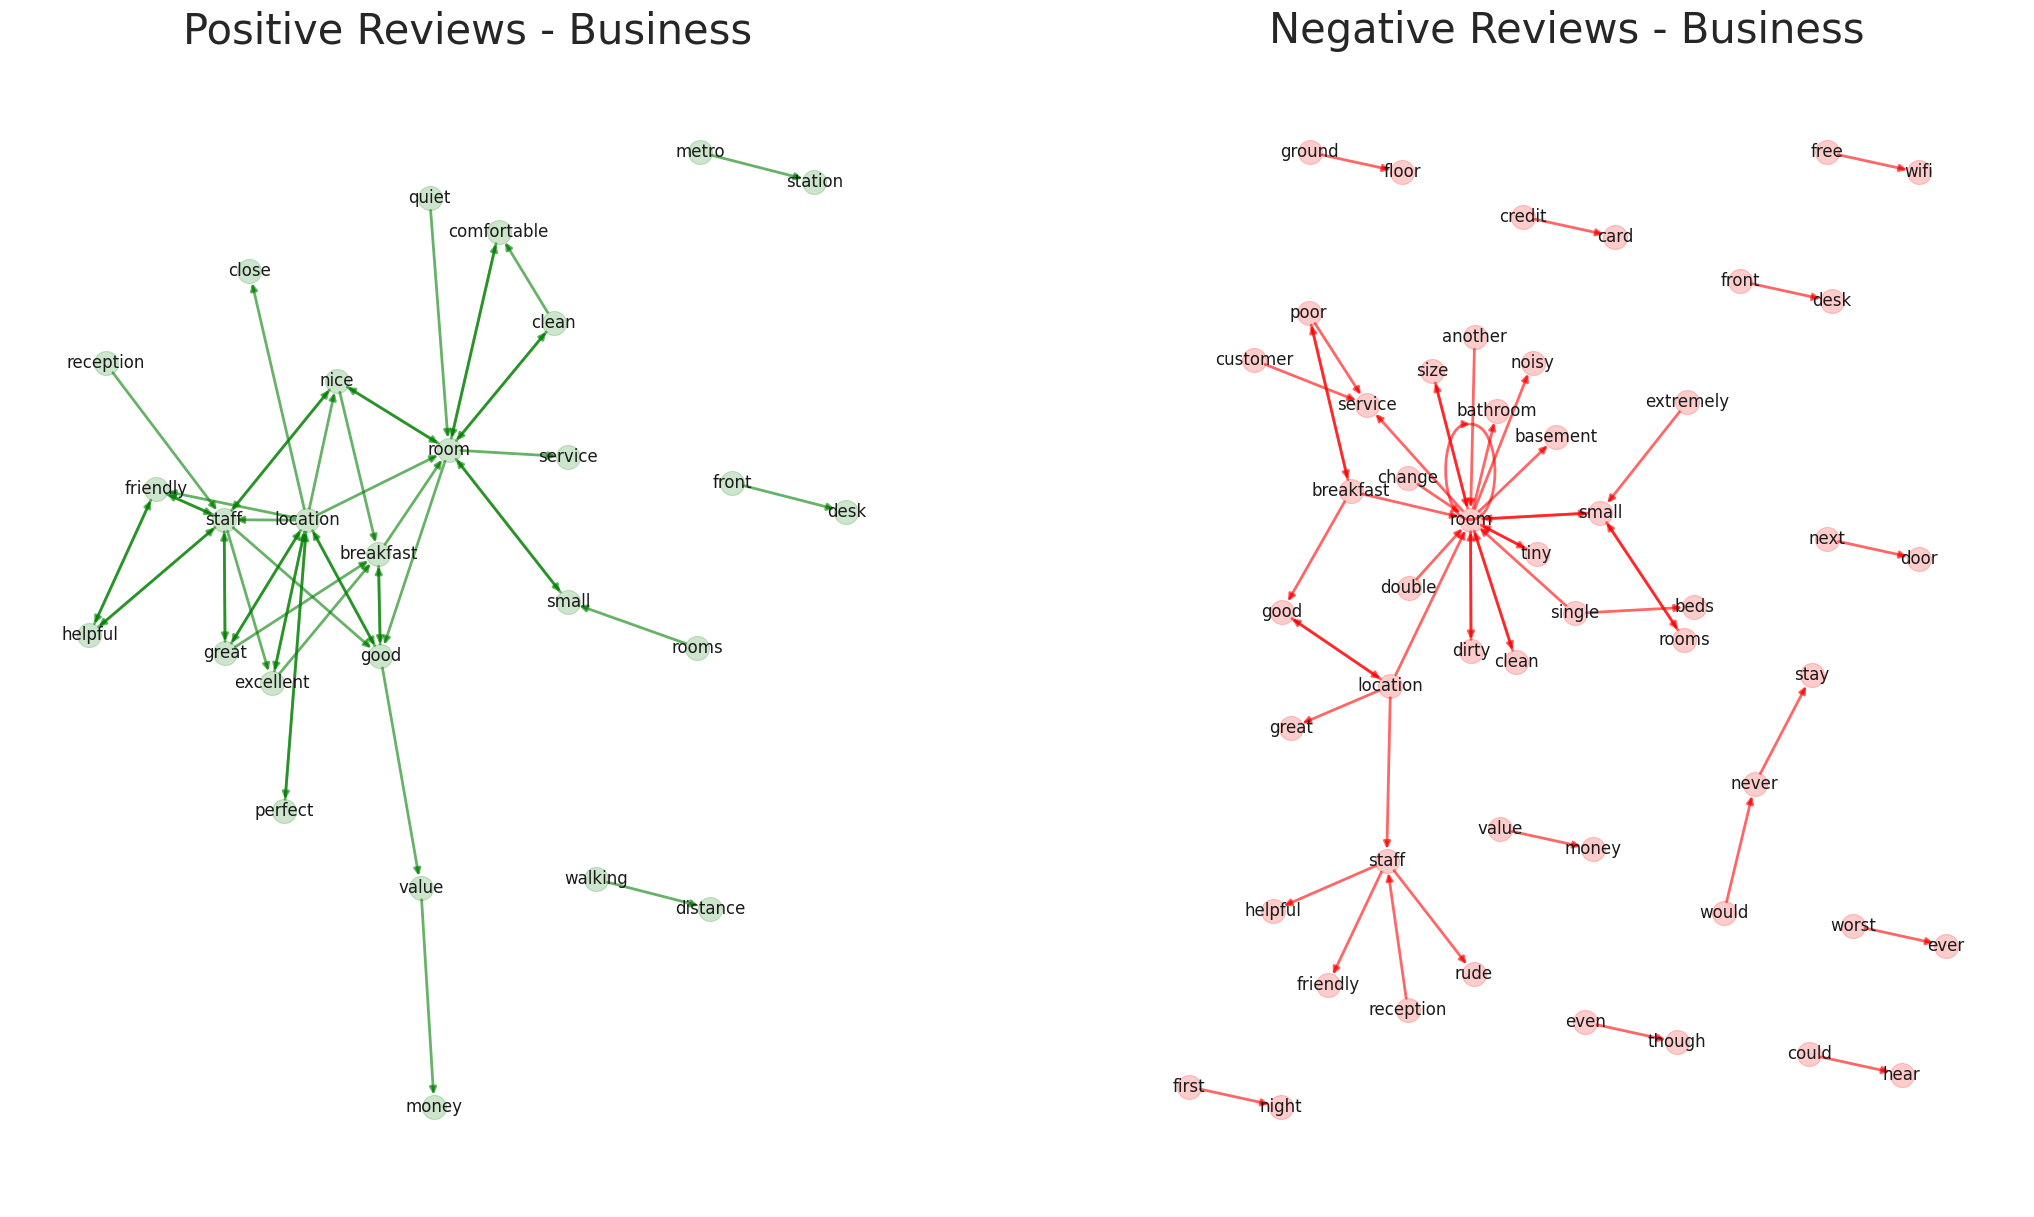

In [ ]:
# set up the figure
f, ax = plt.subplots(1,2,figsize=(26, 15))

# For positive subplot

# use another layout
pos_pos = graphviz_layout(G_pos, prog="neato")

# store the node label information
labels_pos = {}
for node in G_pos.nodes:
    labels_pos[node] = node

# Plot edges
nx.draw_networkx_edges(G_pos, pos_pos, width=2, alpha=0.6, edge_color="green", ax=ax[0])

# Plot nodes
nx.draw_networkx_nodes(G_pos, pos_pos, alpha=0.2, label=True, node_color="green", ax=ax[0])

# Add labels
nx.draw_networkx_labels(G_pos, pos_pos, labels_pos, ax=ax[0])

# Turn off the axis
ax[0].axis("off")
ax[0].set_title('Positive Reviews - Business',fontsize=30)

# For negative subplot

# use another layout
pos_neg = graphviz_layout(G_neg, prog="neato")

# store the node label information
labels_neg = {}
for node in G_neg.nodes:
    labels_neg[node] = node

# Plot edges
nx.draw_networkx_edges(G_neg, pos_neg, width=2, alpha=0.6, edge_color="red", ax=ax[1])

# Plot nodes
nx.draw_networkx_nodes(G_neg, pos_neg, alpha=0.2, label=True, node_color="red", ax=ax[1])

# Add labels
nx.draw_networkx_labels(G_neg, pos_neg, labels_neg, ax=ax[1])

# Turn off the axis
ax[1].axis("off")
ax[1].set_title('Negative Reviews - Business',fontsize=30)

# Save the figure
plt.savefig('directedBigram.png',
            bbox_inches='tight',
            dpi=400)

# Show nicely in the notebook
plt.show()

<ipython-input-28-bd74d99ce754>:11: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos_pos = graphviz_layout(G_pos, prog="neato")
<ipython-input-28-bd74d99ce754>:34: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos_neg = graphviz_layout(G_neg, prog="neato")


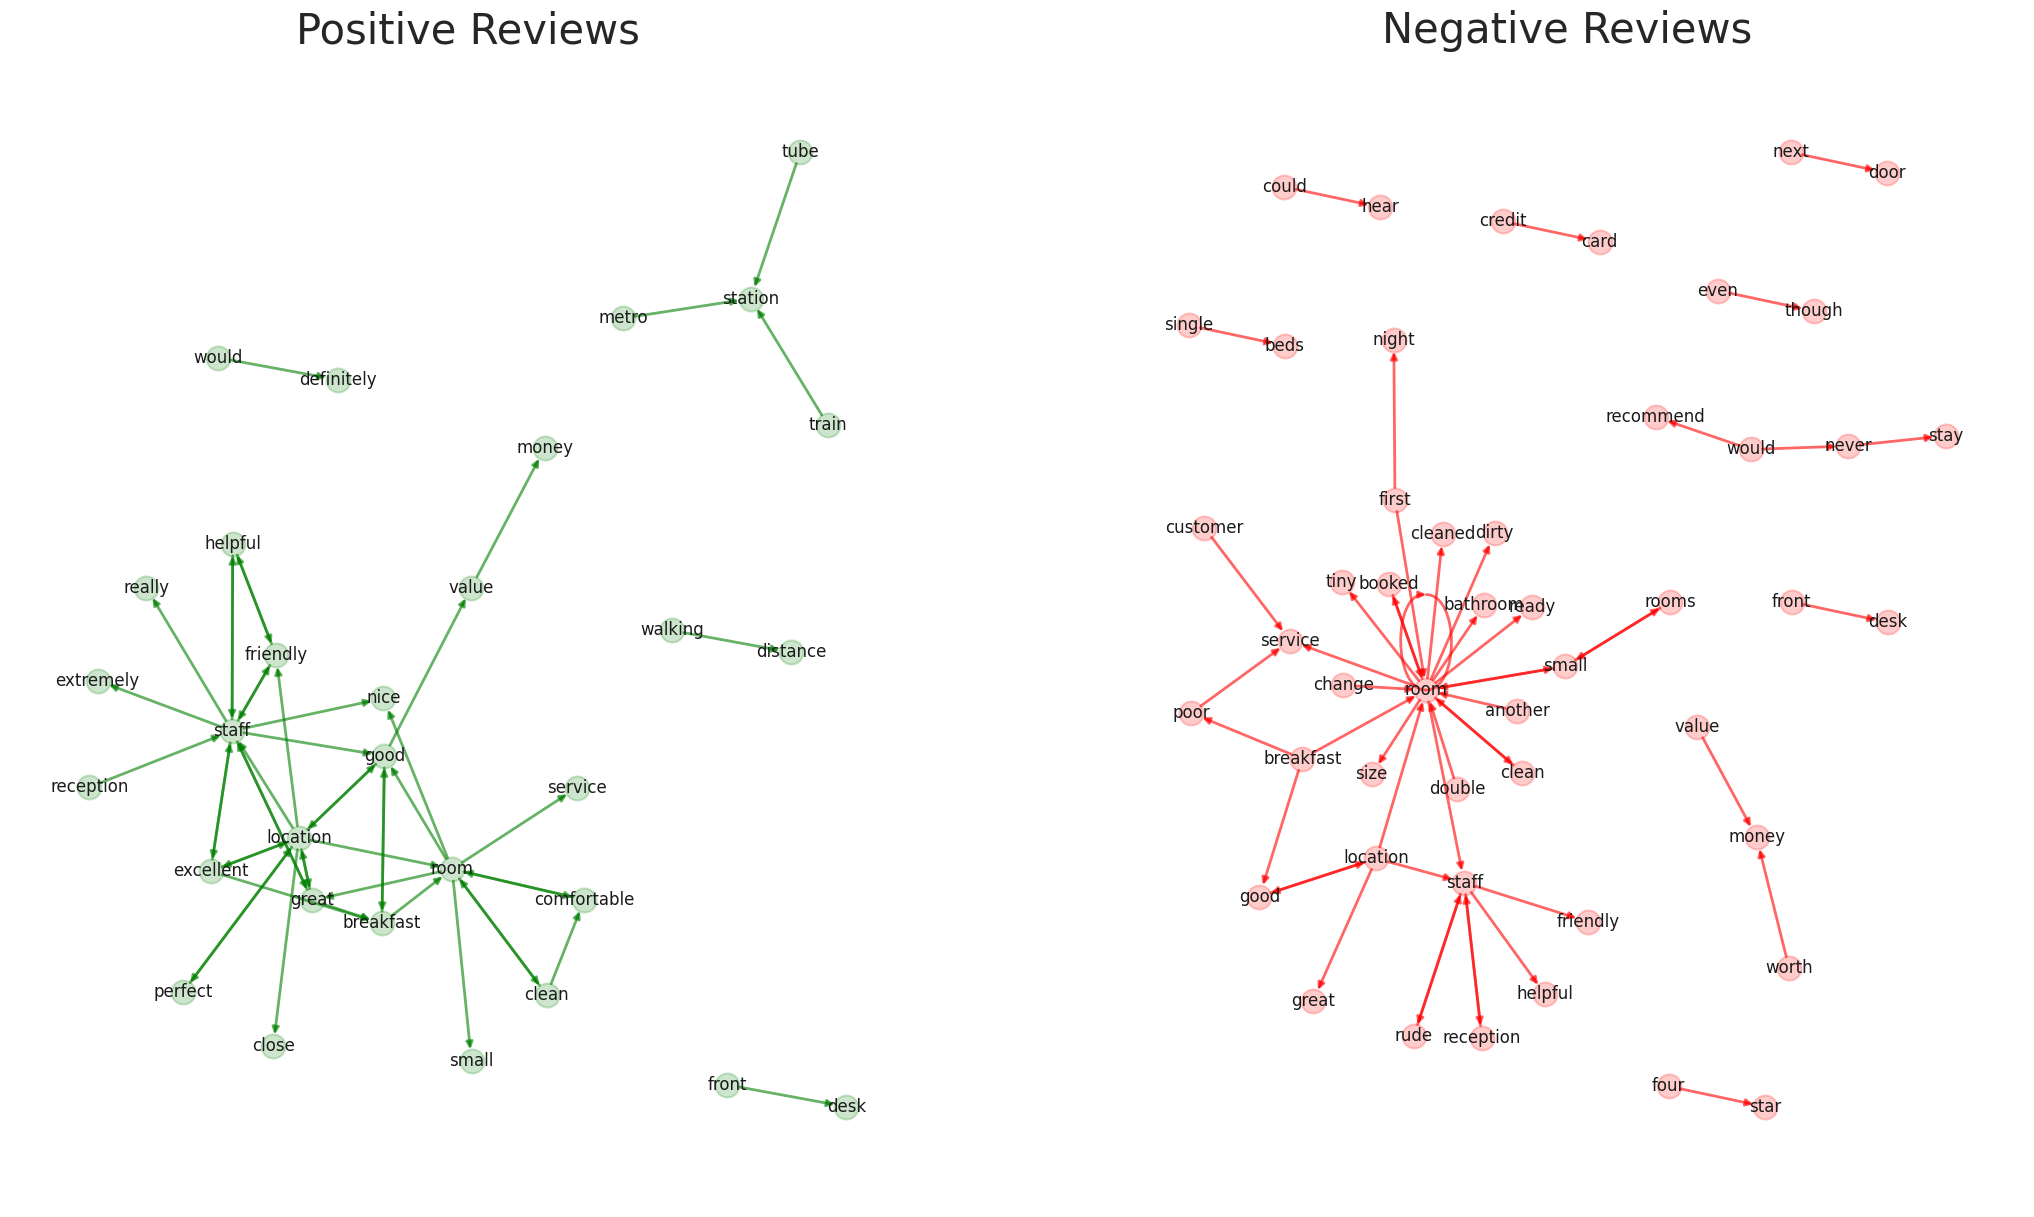

In [ ]:
# Visualisation ALL reviews


# set up the figure
f, ax = plt.subplots(1,2,figsize=(26, 15))

# For positive subplot

# use another layout
pos_pos = graphviz_layout(G_pos, prog="neato")

# store the node label information
labels_pos = {}
for node in G_pos.nodes:
    labels_pos[node] = node

# Plot edges
nx.draw_networkx_edges(G_pos, pos_pos, width=2, alpha=0.6, edge_color="green", ax=ax[0])

# Plot nodes
nx.draw_networkx_nodes(G_pos, pos_pos, alpha=0.2, label=True, node_color="green", ax=ax[0])

# Add labels
nx.draw_networkx_labels(G_pos, pos_pos, labels_pos, ax=ax[0])

# Turn off the axis
ax[0].axis("off")
ax[0].set_title('Positive Reviews',fontsize=30)

# For negative subplot

# use another layout
pos_neg = graphviz_layout(G_neg, prog="neato")

# store the node label information
labels_neg = {}
for node in G_neg.nodes:
    labels_neg[node] = node

# Plot edges
nx.draw_networkx_edges(G_neg, pos_neg, width=2, alpha=0.6, edge_color="red", ax=ax[1])

# Plot nodes
nx.draw_networkx_nodes(G_neg, pos_neg, alpha=0.2, label=True, node_color="red", ax=ax[1])

# Add labels
nx.draw_networkx_labels(G_neg, pos_neg, labels_neg, ax=ax[1])

# Turn off the axis
ax[1].axis("off")
ax[1].set_title('Negative Reviews',fontsize=30)

# Save the figure
plt.savefig('directedBigram.png',
            bbox_inches='tight',
            dpi=400)

# Show nicely in the notebook
plt.show()

# The final section covers creating a scorign system for a room application model

In [ ]:
# Create a new column "Booking_score" based on "booking_type"
df['Booking_score'] = df['Booking_type'].apply(lambda x: 0 if x == 'Leisure trip' else 1)

In [ ]:
# Group by 'Booking_type' and 'Sentiment', then calculate percentages
sentiment_percentages = df.groupby(['Booking_type', 'Sentiment']).size().unstack(fill_value=0)
total_per_booking_type = sentiment_percentages.sum(axis=1)  # Total counts per booking type
sentiment_percentages_percentage = (sentiment_percentages / total_per_booking_type[:, None]) * 100
sentiment_percentages_percentage

<ipython-input-70-c8725763946b>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  sentiment_percentages_percentage = (sentiment_percentages / total_per_booking_type[:, None]) * 100


Sentiment      Negative    Neutral   Positive
Booking_type                                 
Business trip  6.878430  17.182188  75.939382
Leisure trip   3.780478  11.541770  84.677752

In [ ]:
# Create a mapping dictionary for duration types to scores
customer_type_mapping = {
    'Average stay': 0,
    'Single night': 1,
    'Extended stay': 2,
    'Long stay': 3
}

# Create the "duration score" column based on "duration type"
df['Duration_score'] = df['Duration'].map(customer_type_mapping)

In [ ]:
# Group by 'duration' and 'Sentiment', then calculate percentages
sentiment_percentages = df.groupby(['Duration', 'Sentiment']).size().unstack(fill_value=0)
total_per_booking_type = sentiment_percentages.sum(axis=1)  # Total counts per booking type
sentiment_percentages_percentage = (sentiment_percentages / total_per_booking_type[:, None]) * 100
sentiment_percentages_percentage

<ipython-input-123-4266a211e156>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  sentiment_percentages_percentage = (sentiment_percentages / total_per_booking_type[:, None]) * 100


Sentiment      Negative    Neutral   Positive
Duration                                     
Average stay   4.219433  12.416063  83.364505
Extended stay  6.447368  13.872180  79.680451
Long stay      8.421053  14.912281  76.666667
Single night   4.428243  12.678775  82.892982

In [ ]:
# Create a mapping dictionary for customer types to scores
customer_type_mapping = {
    'Couple': 0,
    'Group': 1,
    'Family': 2,
    'Solo traveler': 3
}

# Create the "Customer score" column based on "customer type"
df['Customer_score'] = df['Customer_type'].map(customer_type_mapping)


In [ ]:
# Group by 'customer type' and 'Sentiment', then calculate percentages
sentiment_percentages = df.groupby(['Customer_type', 'Sentiment']).size().unstack(fill_value=0)
total_per_booking_type = sentiment_percentages.sum(axis=1)  # Total counts per booking type
sentiment_percentages_percentage = (sentiment_percentages / total_per_booking_type[:, None]) * 100
sentiment_percentages_percentage

<ipython-input-125-fbee32891980>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  sentiment_percentages_percentage = (sentiment_percentages / total_per_booking_type[:, None]) * 100


Sentiment      Negative    Neutral   Positive
Customer_type                                
Couple         3.659140  11.549124  84.791736
Family         4.768817  12.503867  82.727316
Group          4.174844  11.590366  84.234789
Solo traveler  5.723156  15.607555  78.669289

In [ ]:
# Create a mapping dictionary for room types to scores
customer_type_mapping = {
    'Suite': 0,
    'Luxury Room': 1,
    'Other': 2,
    'Double Room': 3,
    'Family Room': 4,
    'Twin Room': 5,
    'Single Room': 6
}

# Create the "room score" column based on "room type"
df['Room_score'] = df['Room_type'].map(customer_type_mapping)

In [ ]:
# Group by 'room type' and 'Sentiment', then calculate percentages
sentiment_percentages = df.groupby(['Room_type', 'Sentiment']).size().unstack(fill_value=0)
total_per_booking_type = sentiment_percentages.sum(axis=1)  # Total counts per booking type
sentiment_percentages_percentage = (sentiment_percentages / total_per_booking_type[:, None]) * 100
sentiment_percentages_percentage

<ipython-input-127-66cfaece6546>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  sentiment_percentages_percentage = (sentiment_percentages / total_per_booking_type[:, None]) * 100


Sentiment    Negative    Neutral   Positive
Room_type                                  
Double Room  4.474684  12.926866  82.598450
Family Room  5.112623  13.673294  81.214083
Luxury Room  3.666031  11.360223  84.973746
Other        4.155977  11.044125  84.799897
Single Room  6.343081  16.535550  77.121370
Suite        3.932891  10.495513  85.571596
Twin Room    5.310523  14.124678  80.564800

In [ ]:
# Apply mappings and formatting
df['Customer_score'] = df['Customer_score'].astype(int)
df['Booking_score'] = df['Booking_score'].astype(int)
df['Room_score'] = df['Room_score'].astype(int)
df['Duration_score'] = df['Duration_score'].astype(int)

# Calculate the 'Final_score' column as the sum of the other scores
df['Final_score'] = df['Customer_score'] + df['Booking_score'] + df['Room_score'] + df['Duration_score']



In [ ]:
 #Get unique combinations of features for each unique 'Final_score'
unique_scores = df['Final_score'].unique()

for score in unique_scores:
    score_entries = df[df['Final_score'] == score][['Customer_type', 'Booking_type', 'Duration', 'Room_type']]
    unique_combinations = score_entries.drop_duplicates()

    print(f"Score {score}:")
    for index, row in unique_combinations.iterrows():
        print(f"  Customer Type: {row['Customer_type']}, Booking Type: {row['Booking_type']}, Duration: {row['Duration']}, Room Type: {row['Room_type']}")
    print("\n")

Score 3:
  Customer Type: Couple, Booking Type: Leisure trip, Duration: Average stay, Room Type: Double Room
  Customer Type: Family, Booking Type: Leisure trip, Duration: Average stay, Room Type: Luxury Room
  Customer Type: Group, Booking Type: Leisure trip, Duration: Single night, Room Type: Luxury Room
  Customer Type: Couple, Booking Type: Business trip, Duration: Single night, Room Type: Luxury Room
  Customer Type: Couple, Booking Type: Leisure trip, Duration: Extended stay, Room Type: Luxury Room
  Customer Type: Group, Booking Type: Business trip, Duration: Average stay, Room Type: Luxury Room
  Customer Type: Solo traveler, Booking Type: Leisure trip, Duration: Average stay, Room Type: Suite
  Customer Type: Family, Booking Type: Leisure trip, Duration: Single night, Room Type: Suite
  Customer Type: Couple, Booking Type: Leisure trip, Duration: Long stay, Room Type: Suite
  Customer Type: Family, Booking Type: Business trip, Duration: Average stay, Room Type: Suite
  Custome